In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import random
import operator
from sklearn.preprocessing import StandardScaler, Imputer
from scipy.spatial.distance import euclidean, cosine
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor



/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [65]:
df = pd.read_csv('../data/data_for_model.csv', index_col='Season_Player')
df.drop([
    'Player', 'Season_Player.1', 'Season', 'Season_index'
], axis=1, inplace=True)

In [66]:
df['forward'] = df['position'] != 'Defense'
df['signing_status'] = df.signing_status.apply(lambda x: 1 if 'UFA' else 0)
#These columns were causing problems
df.drop(['mean SH%', 'IPP', 'mean Faceoffs pct'], axis =1, inplace = True)

In [67]:
ycols = ['cap_hit', 'length', 'total_value', 'cap_pct', 'signing_year_cap']
xcols = ['signing_age', 'signing_status'] + list(df.columns)[10:]

In [53]:
df.columns

Index(['position', 'cap_hit', 'length', 'total_value', 'signing_year',
       'signing_age', 'signing_year_cap', 'cap_pct', 'signing_status', 'GP',
       ...
       'mean Shots/60', 'Hits/60', 'mean Hits/60', 'PIM/60', 'mean PIM/60',
       'Penalties Drawn/60', 'mean Penalties Drawn/60', 'Goalness',
       'mean Goalness', 'forward'],
      dtype='object', length=204)

In [68]:
X, y = df[xcols], df[ycols]

In [69]:
X.replace('-', 0, inplace=True)

X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose = 1)
X = imp.fit_transform(X)

In [57]:
X.shape

(1170, 196)

In [58]:
Xdf = pd.DataFrame(X, columns = xcols)

In [59]:
Xdf.head()

signing_age  signing_status      TOI  Goals  Total Assists  First Assists  \
0         35.0             1.0  1455.30   11.0           12.0            4.0   
1         37.0             1.0  1742.77    5.0           13.0            8.0   
2         31.0             1.0  2120.85   27.0           48.0           25.0   
3         41.0             1.0  1671.95    7.0           17.0            7.0   
4         37.0             1.0  1152.15   20.0           20.0           14.0   

   Second Assists  Total Points  Shots    iCF   ...     mean Shots/60  \
0             8.0          23.0  110.0  213.0   ...          4.058853   
1             5.0          18.0  132.0  279.0   ...          4.213435   
2            23.0          75.0  353.0  750.0   ...          9.642827   
3            10.0          24.0  144.0  323.0   ...          4.912471   
4             6.0          40.0  165.0  253.0   ...          7.525010   

    Hits/60  mean Hits/60    PIM/60  mean PIM/60  Penalties Drawn/60  \
0  4.329004      4.258938  1.978973     1.529216            0.206143   
1  2.513240      2.923142  1.101694     1.347386            0.240996   
2  2.857345      4.506849  1.499399     1.738683            0.480939   
3  5.059960      4.542353  2.153174     2.130981            0.502407   
4  5.363885      6.593175  1.145684     1.916416            0.624919   

   mean Penalties Drawn/60  Goalness  mean Goalness  forward  
0                 0.271543  0.458333       0.323077      0.0  
1                 0.228370  0.263158       0.315789      0.0  
2                 0.571935  0.355263       0.358696      0.0  
3                 0.616863  0.280000       0.285714      0.0  
4                 0.843926  0.487805       0.411765      1.0  

[5 rows x 196 columns]

Index(['2014 Francois Beauchemin', '2016 Francois Beauchemin',
       '2015 Brent Burns', '2017 Zdeno Chara', '2015 Jason Chimera',
       '2014 Matt Cullen', '2015 Matt Cullen', '2016 Matt Cullen',
       '2017 Matt Cullen', '2016 Trevor Daley',
       ...
       '2017 Jan Rutta', '2014 Viktor Stalberg', '2015 Viktor Stalberg',
       '2014 Alexander Semin', '2014 Mike Ribeiro', '2016 Matt Carle',
       '2014 Cody Hodgson', '2014 Simon Despres', '2014 Dominik Uher',
       '2015 Linden Vey'],
      dtype='object', name='Season_Player', length=1170)

In [60]:
Xdf.shape, y.shape

((1170, 196), (1170, 5))

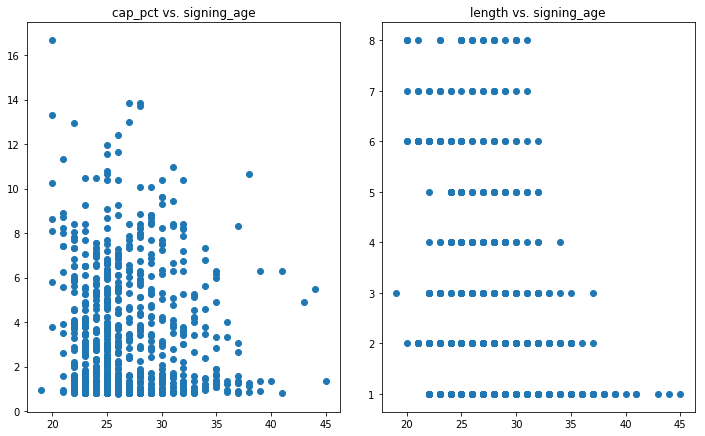

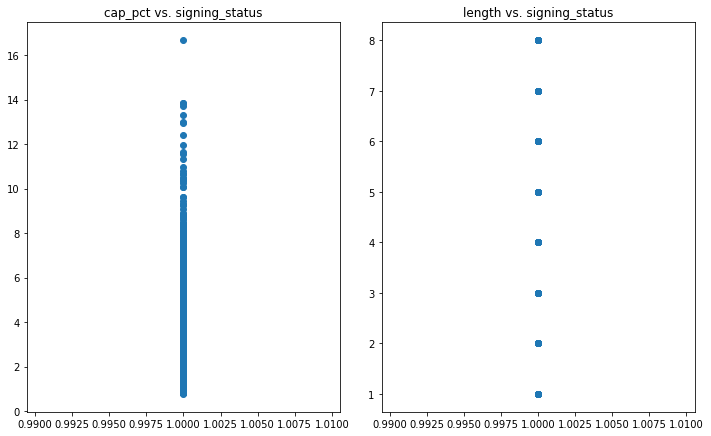

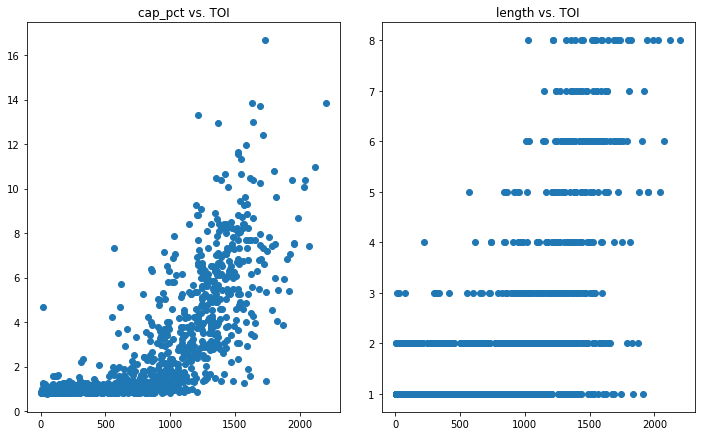

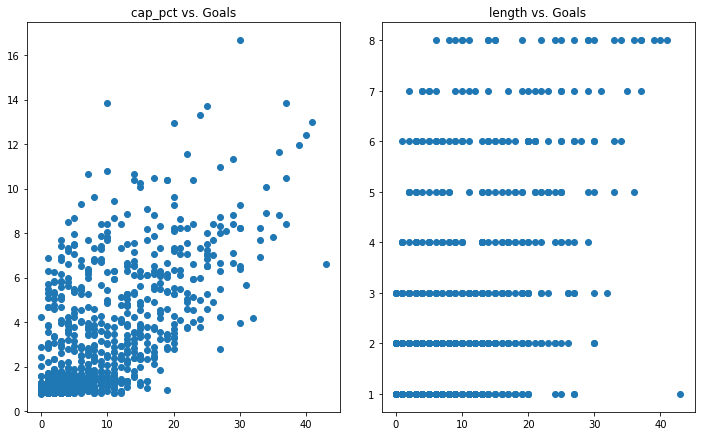

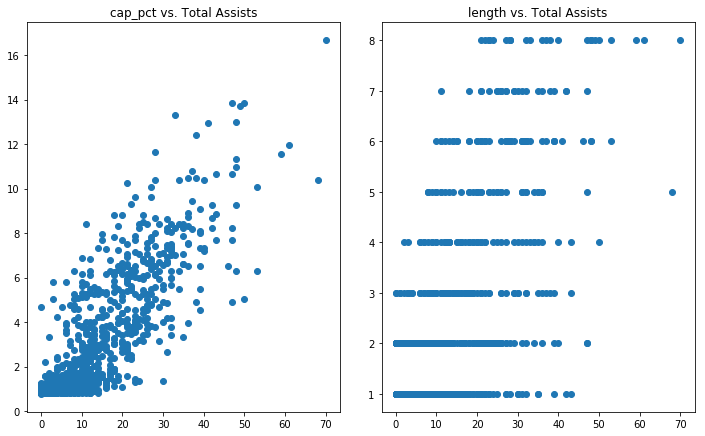

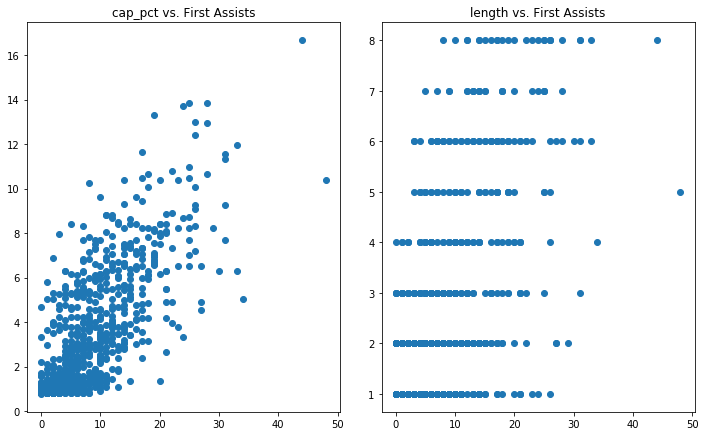

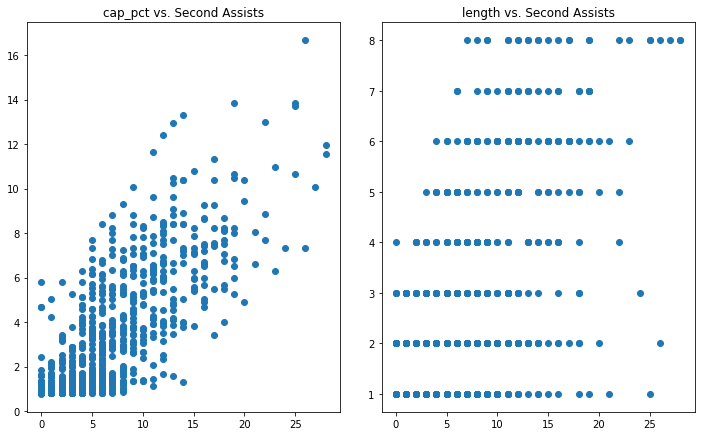

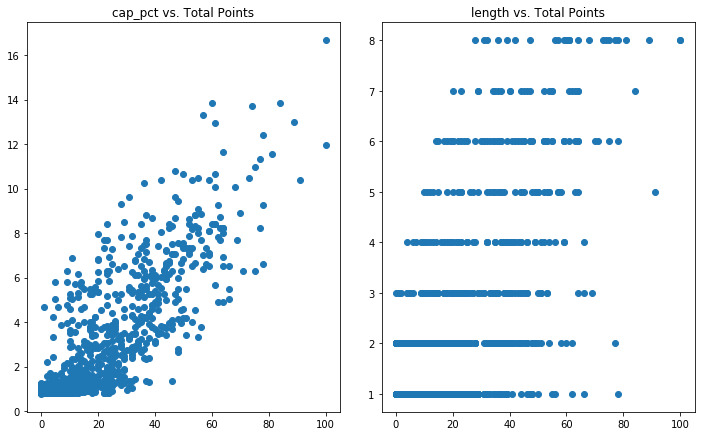

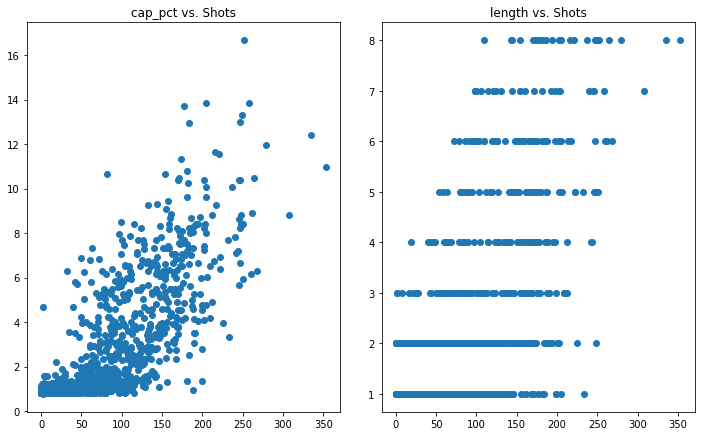

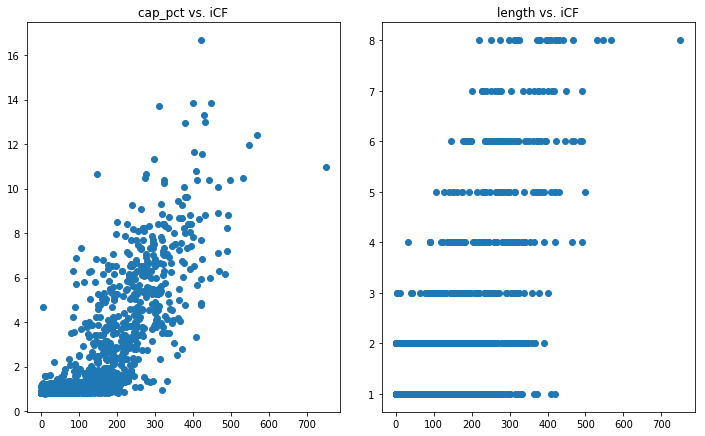

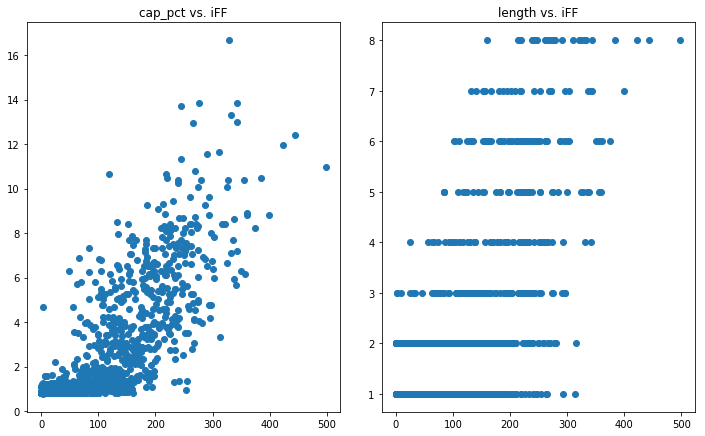

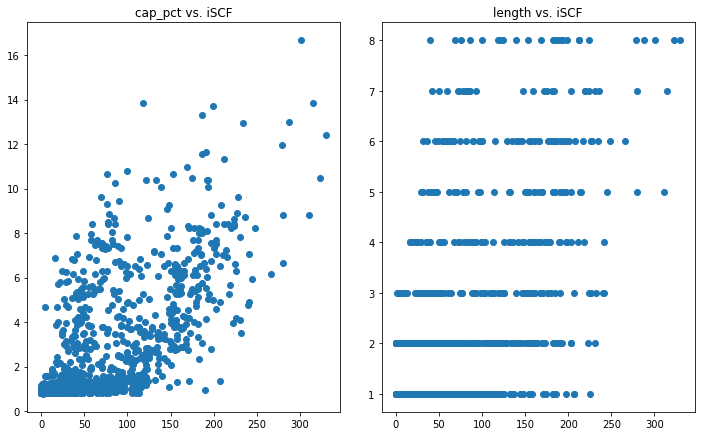

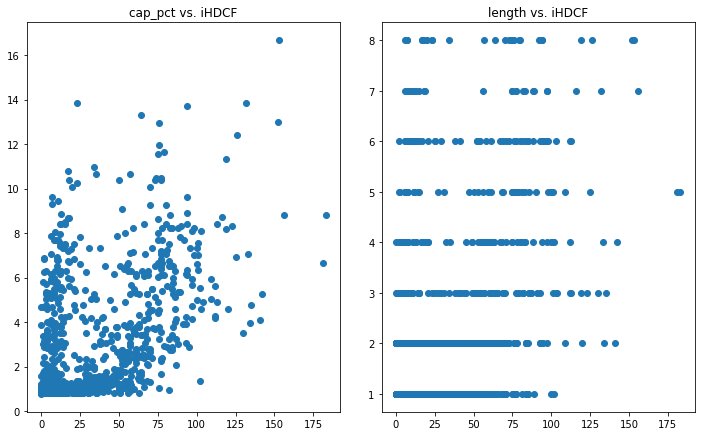

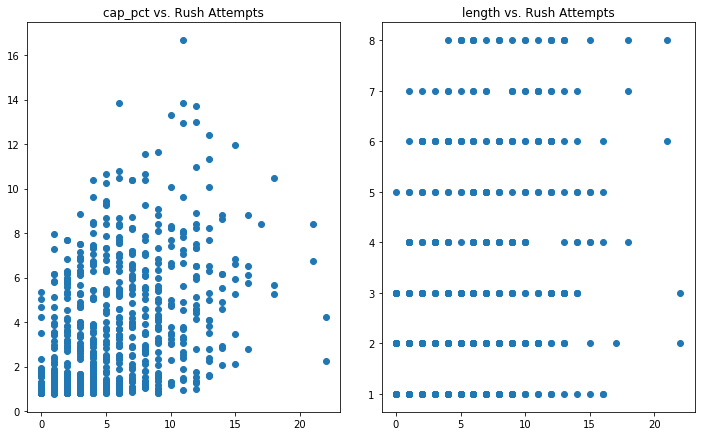

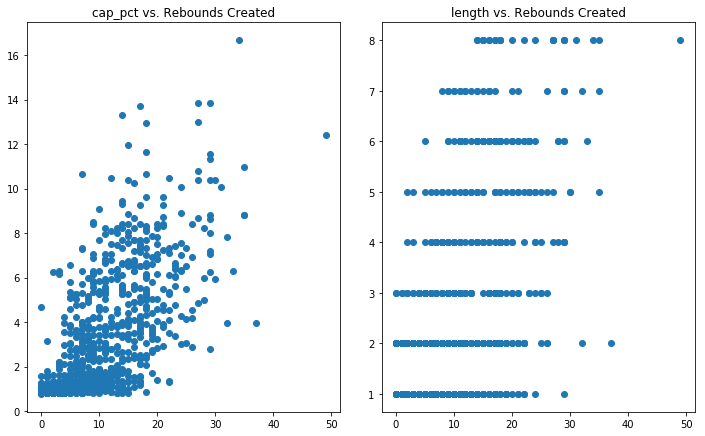

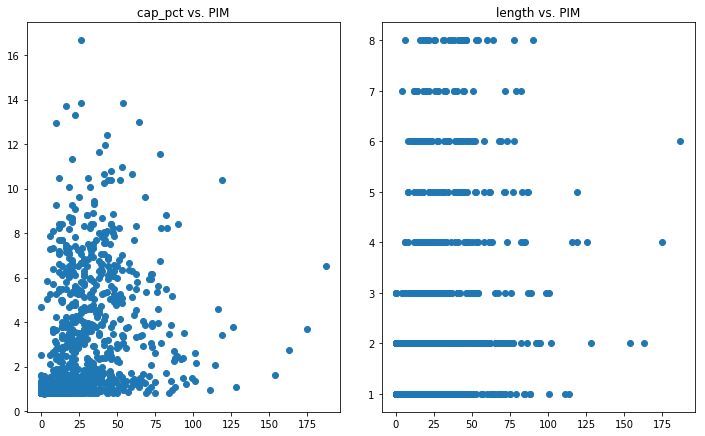

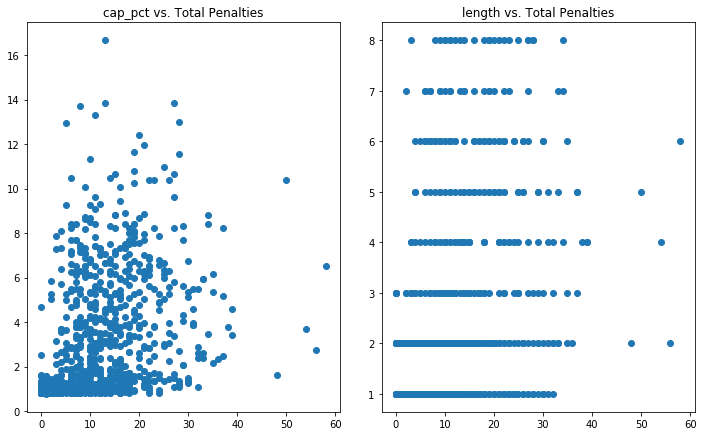

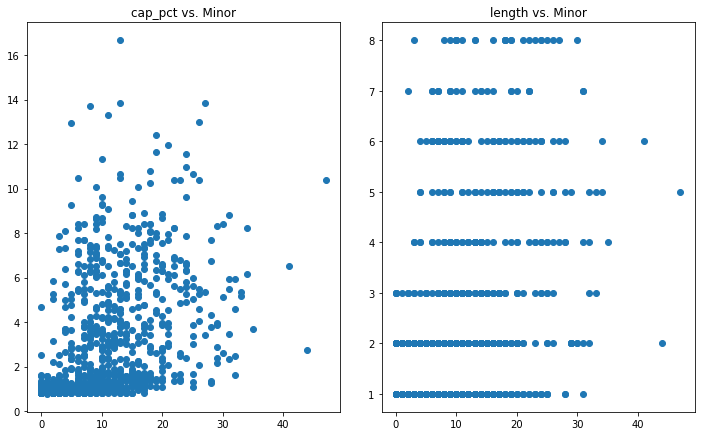

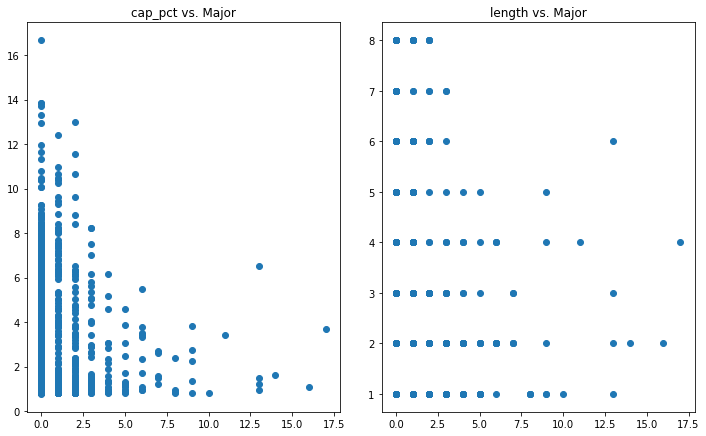

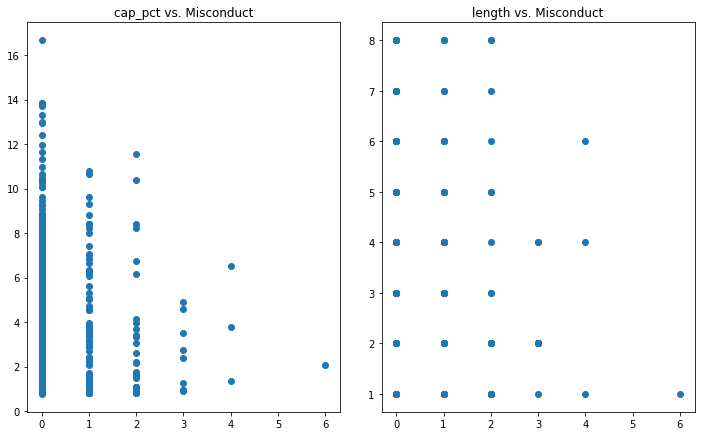

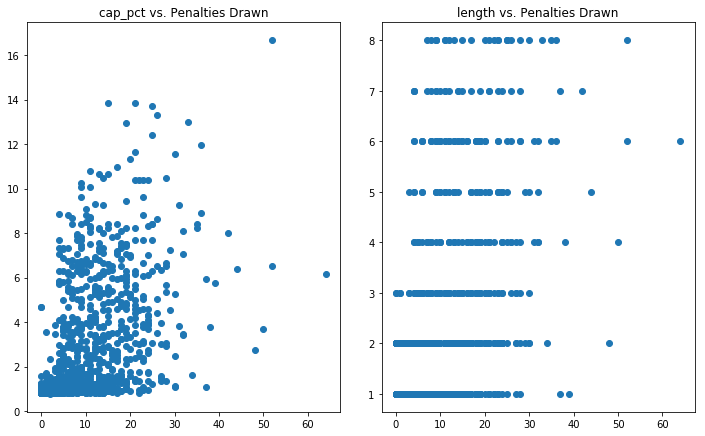

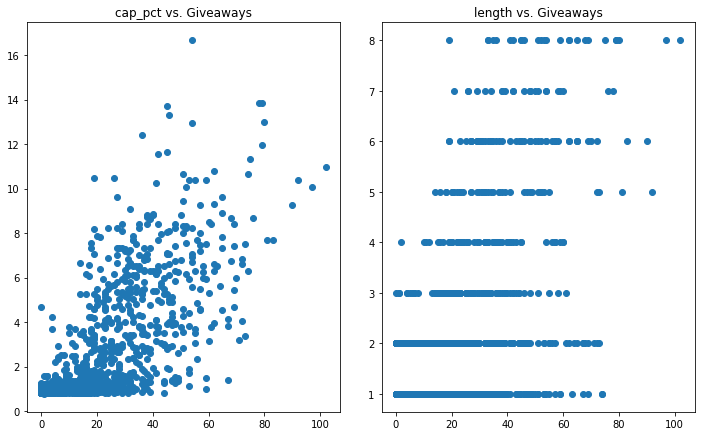

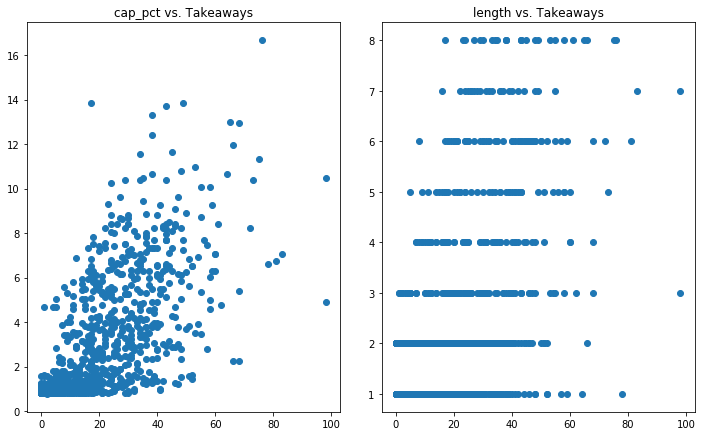

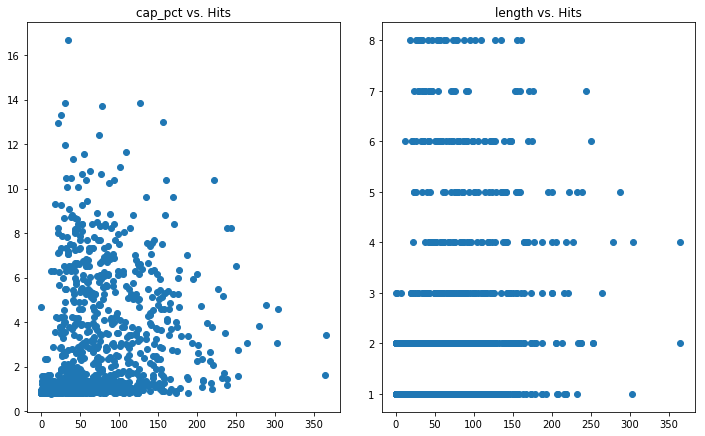

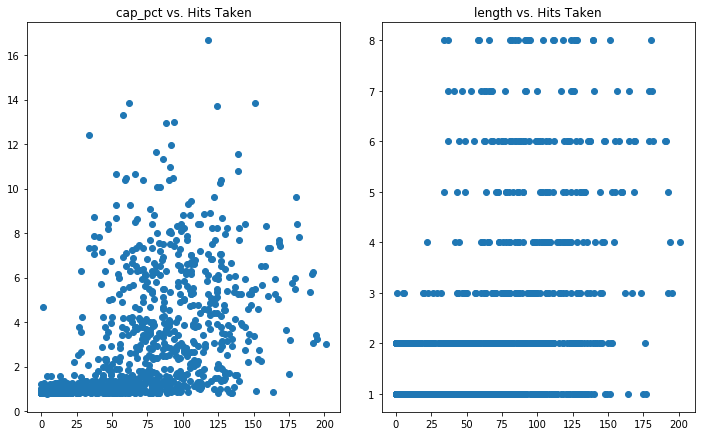

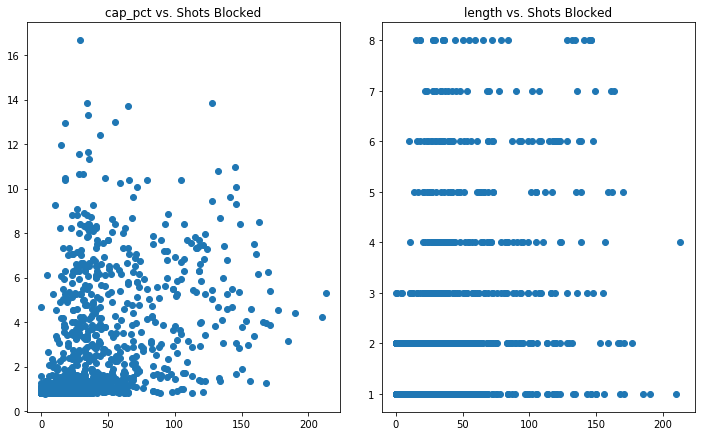

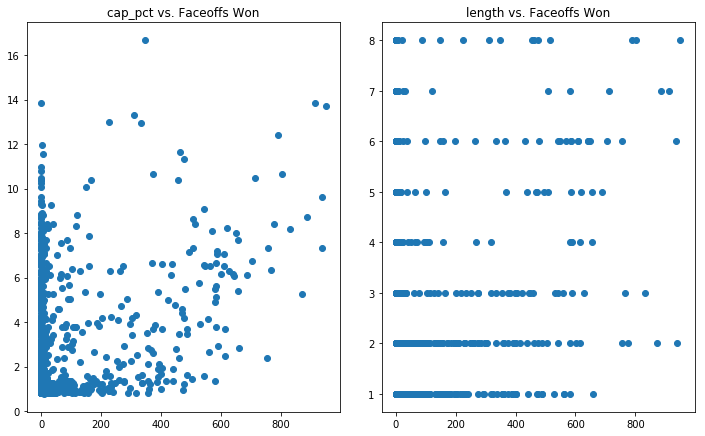

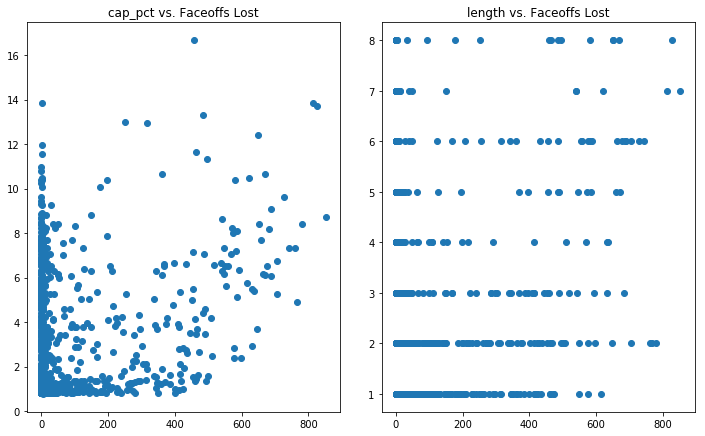

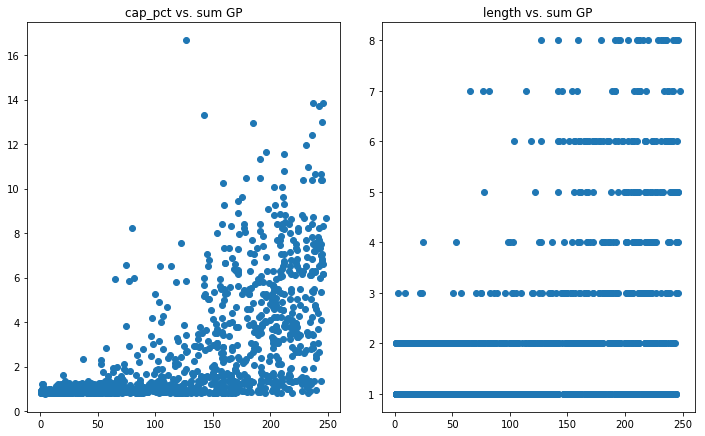

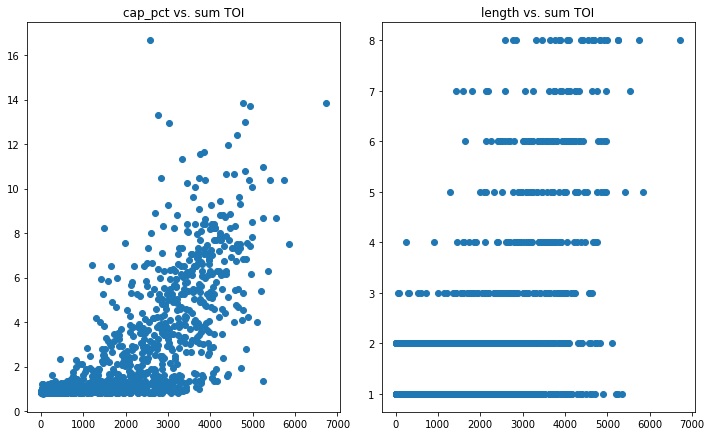

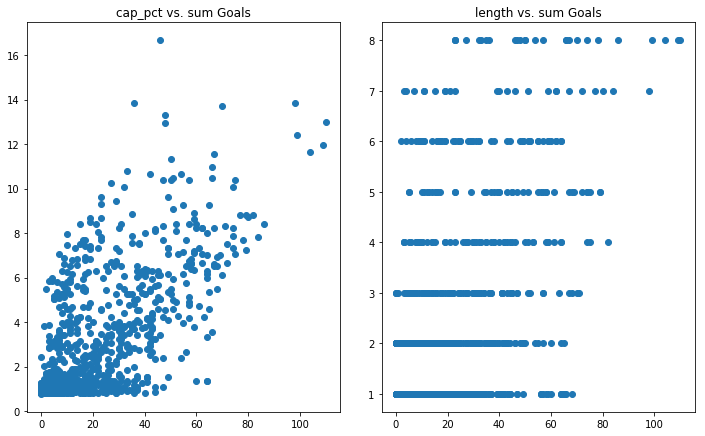

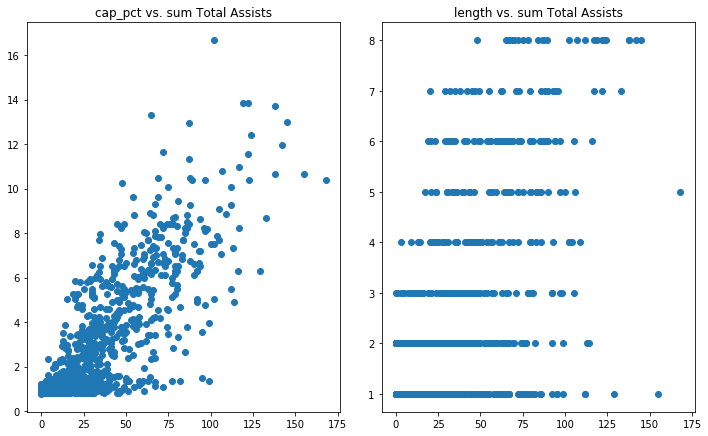

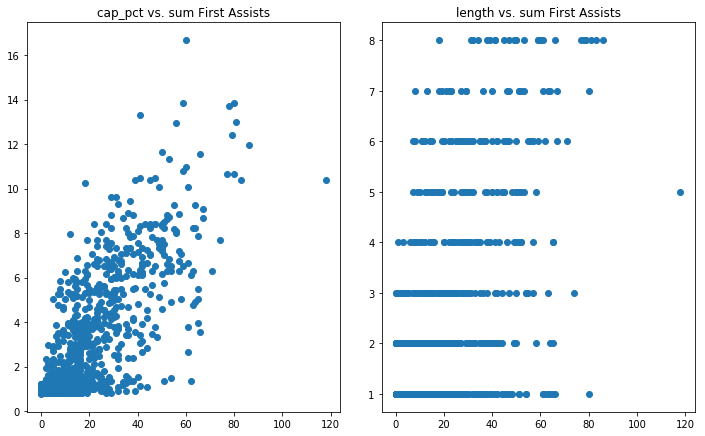

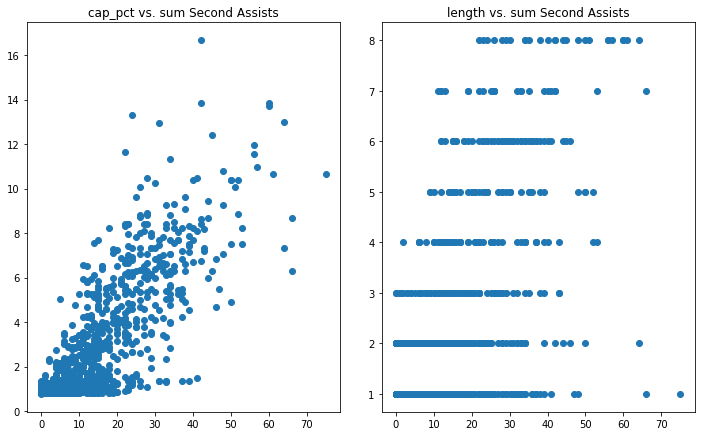

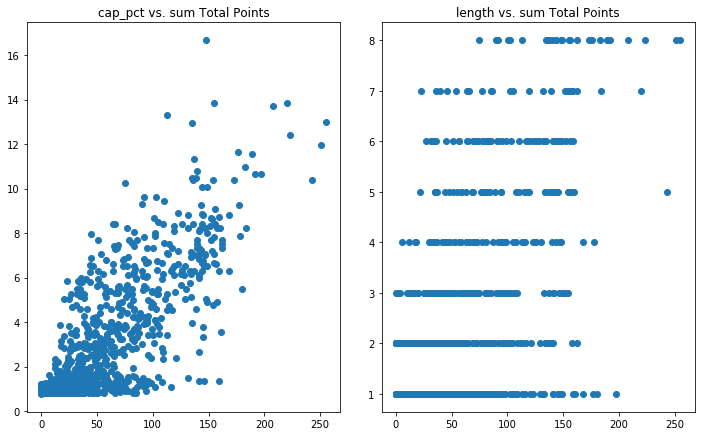

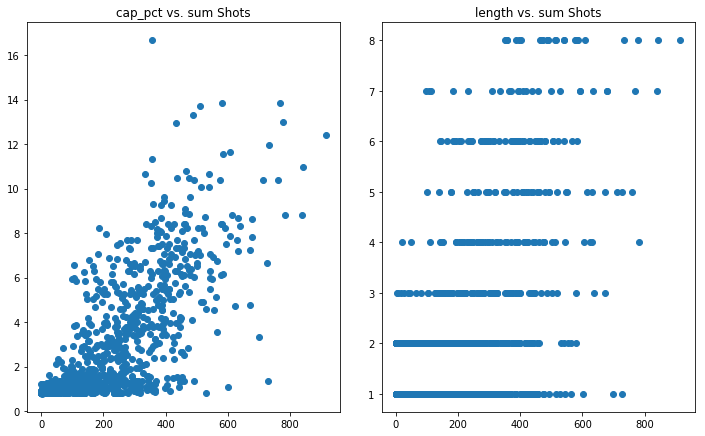

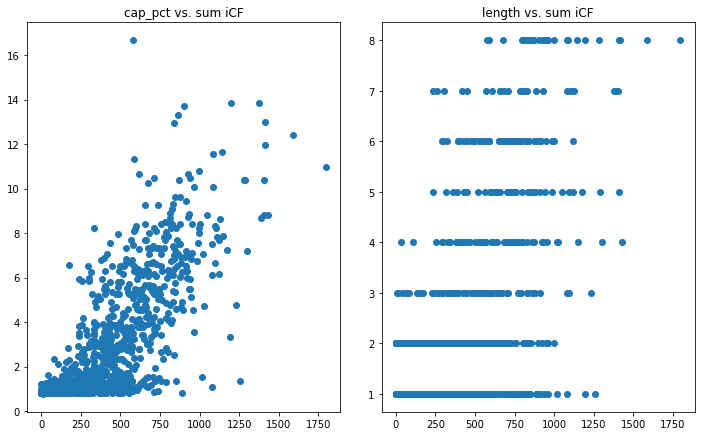

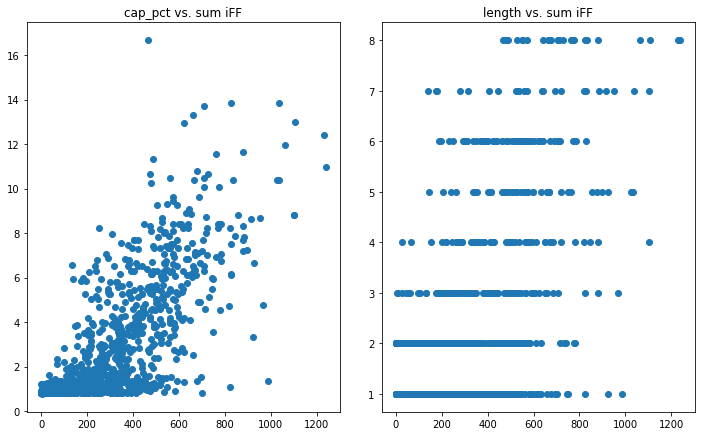

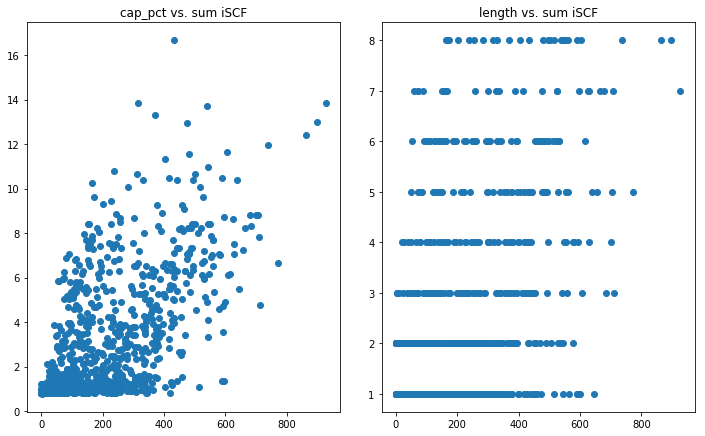

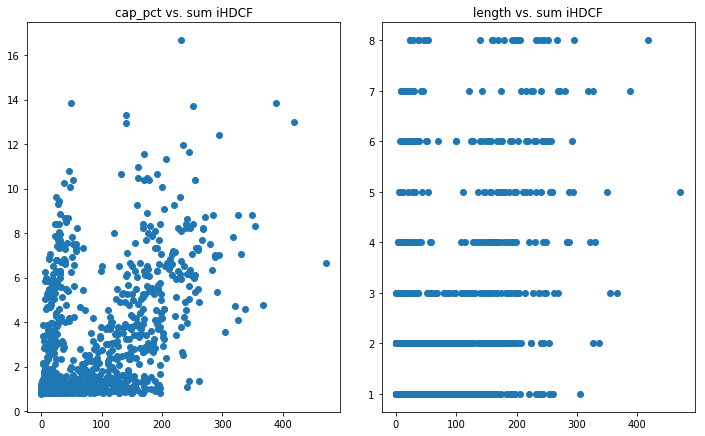

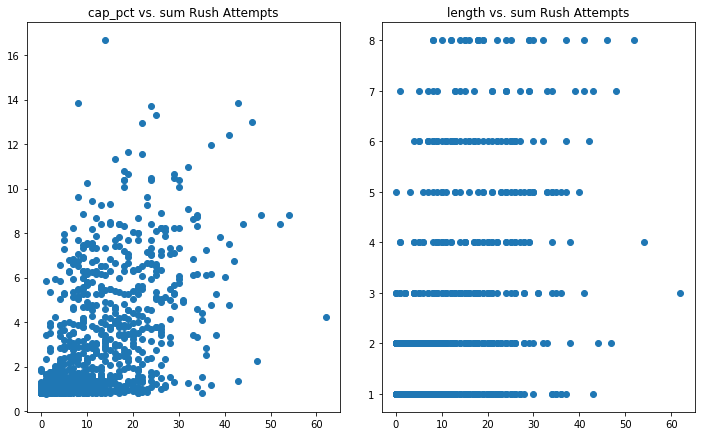

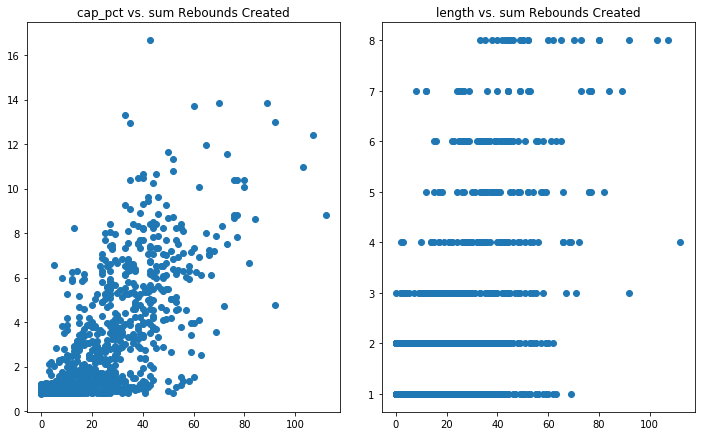

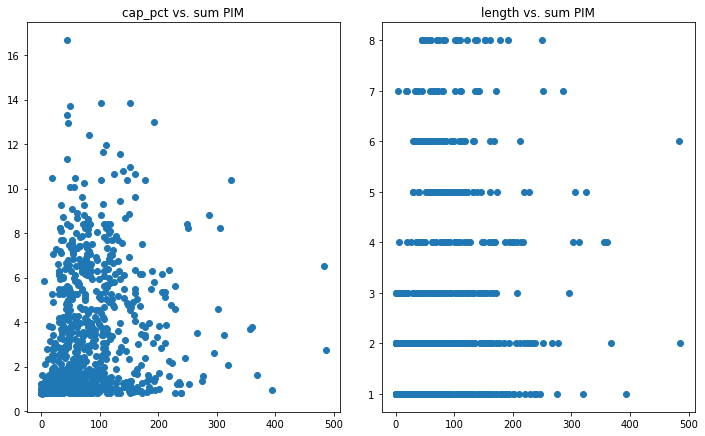

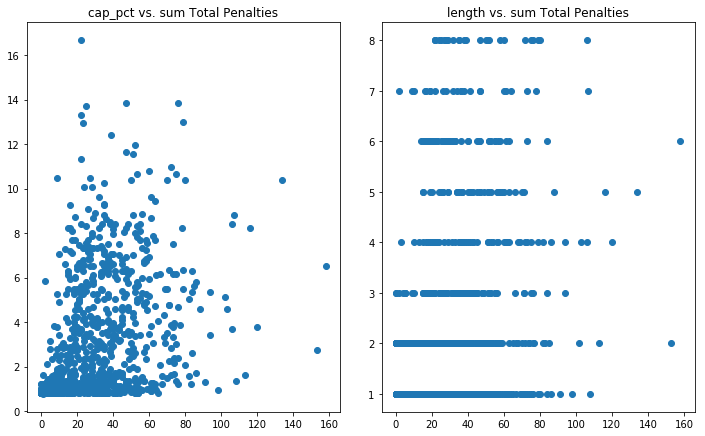

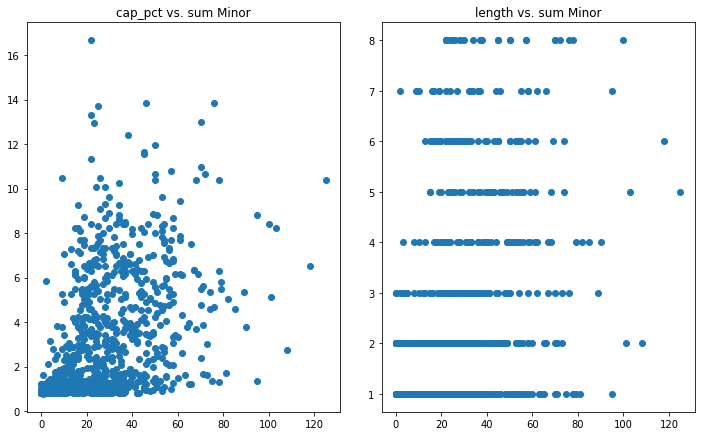

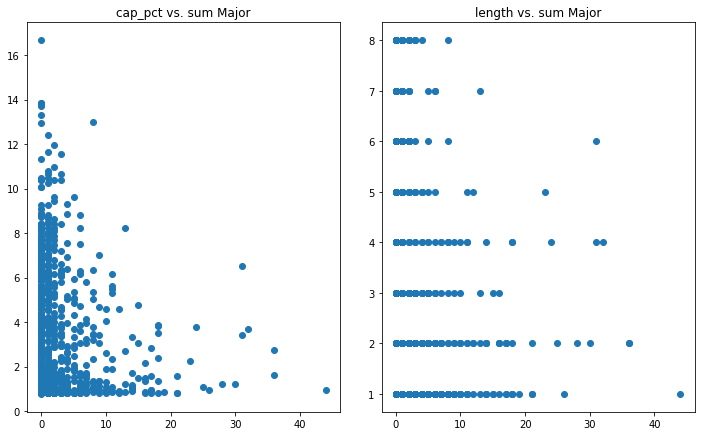

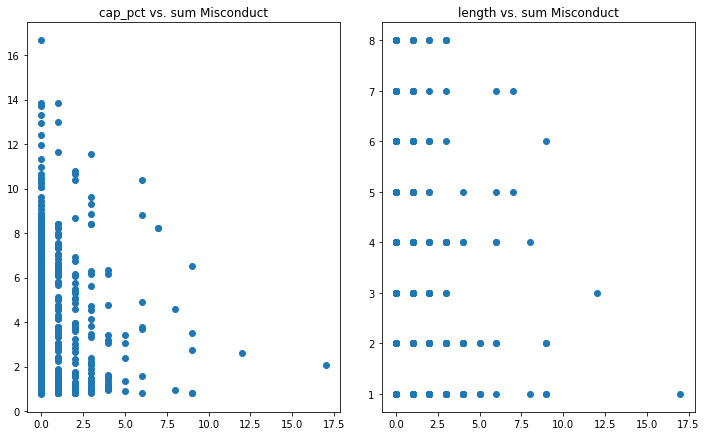

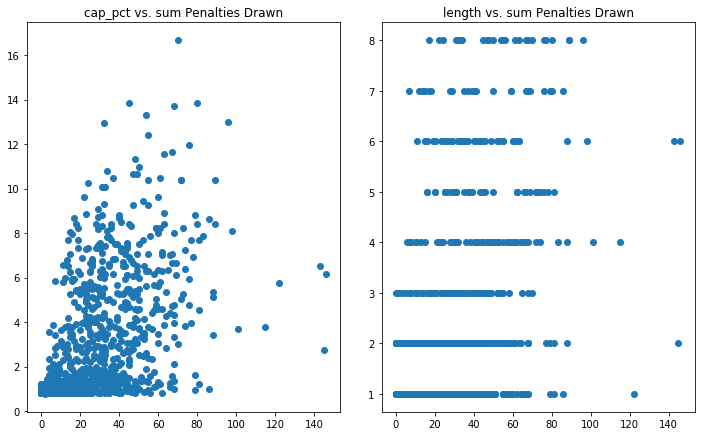

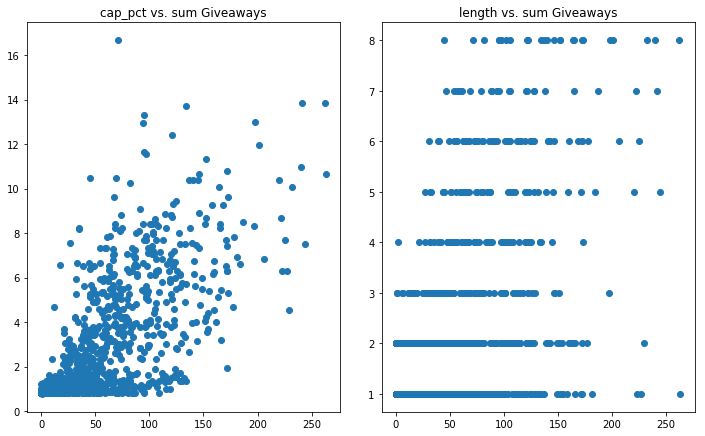

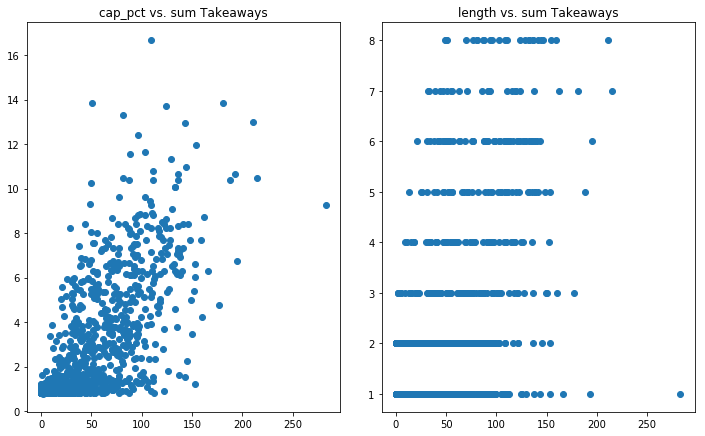

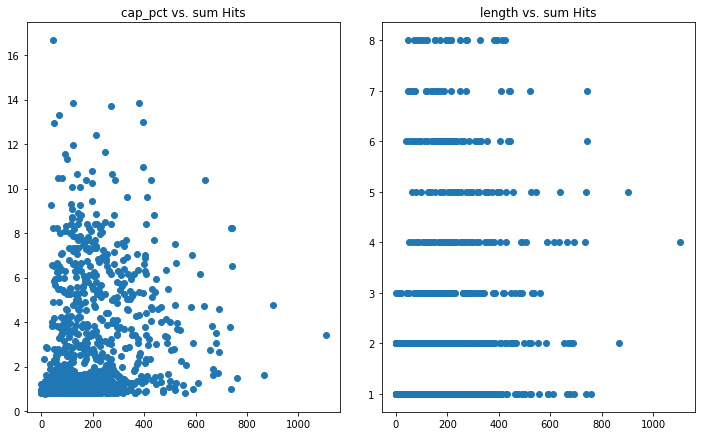

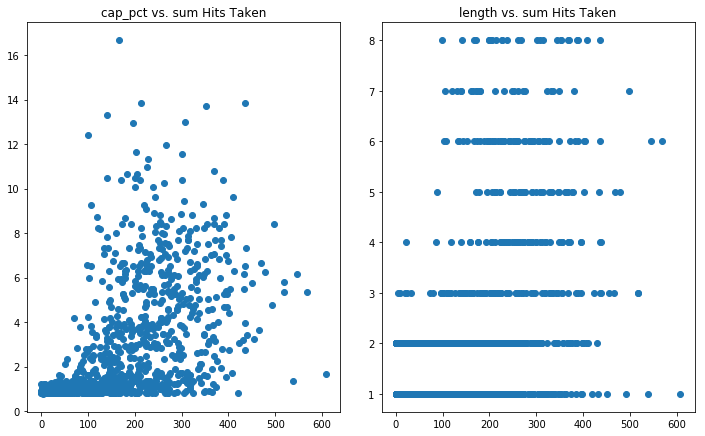

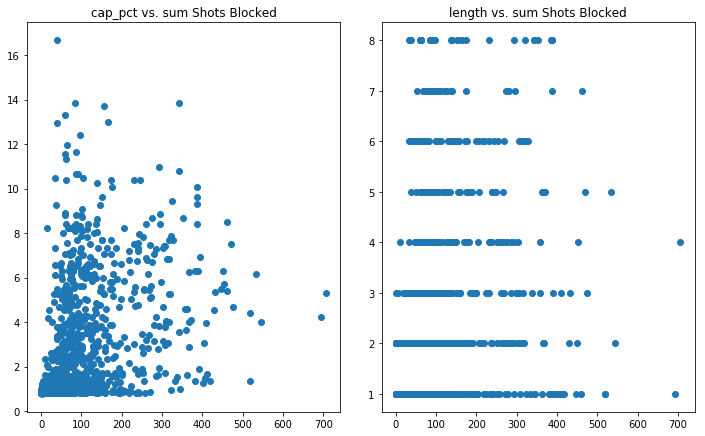

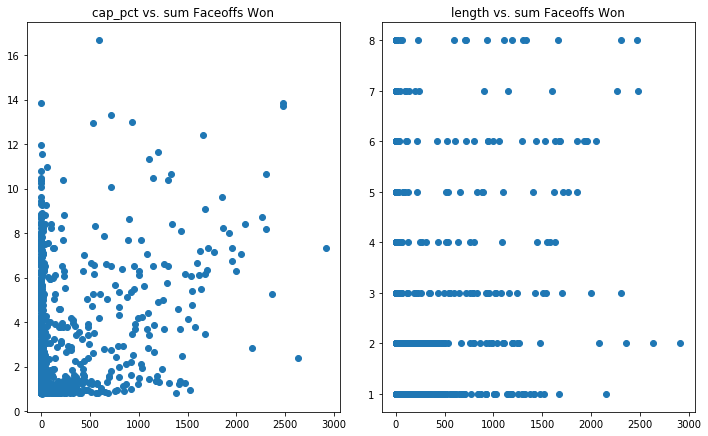

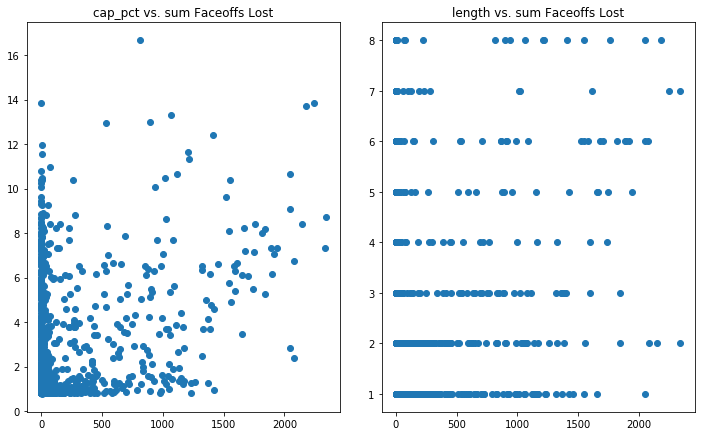

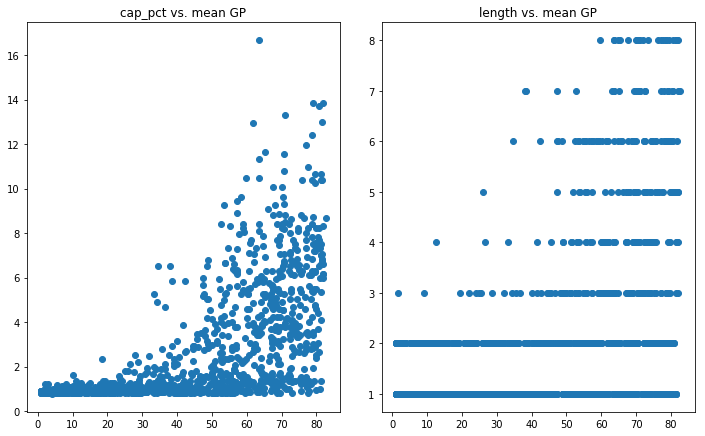

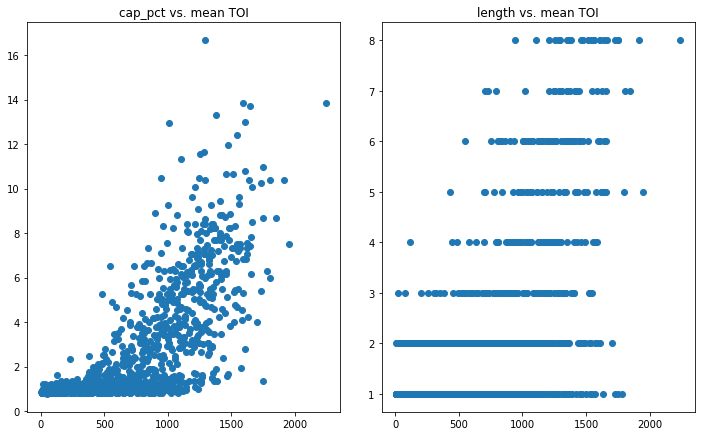

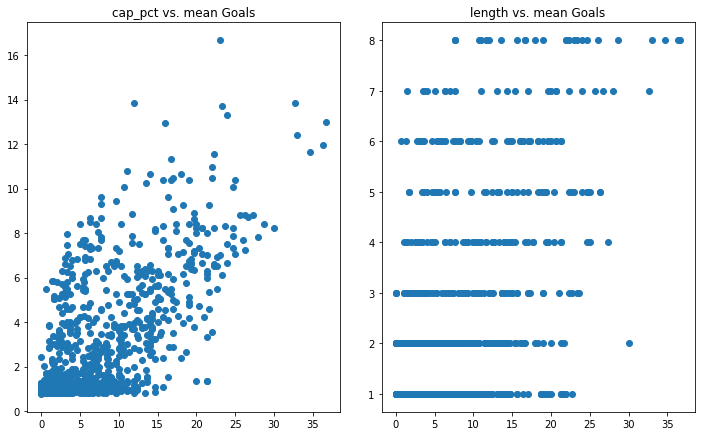

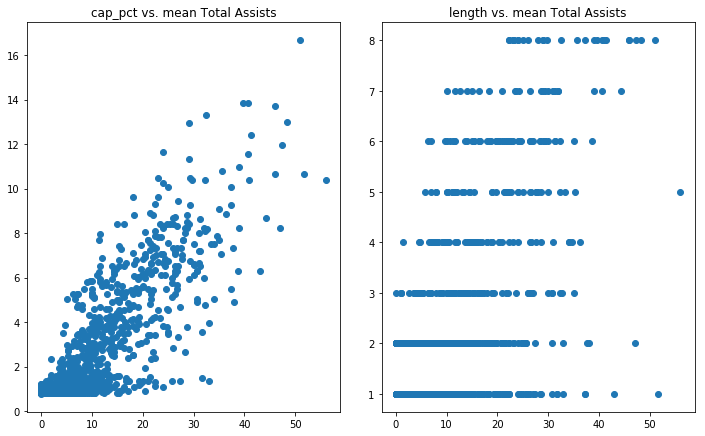

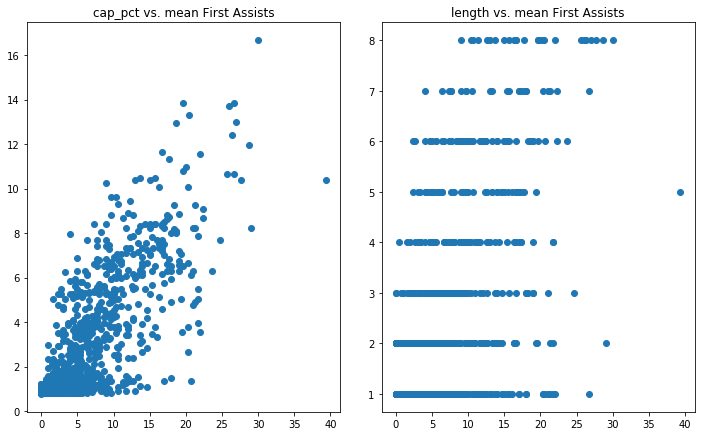

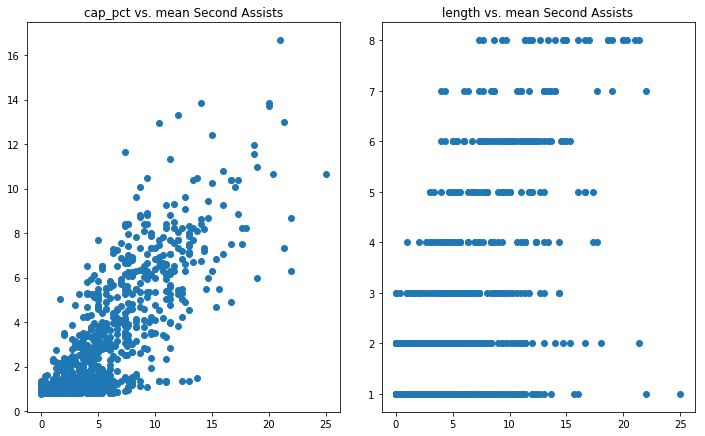

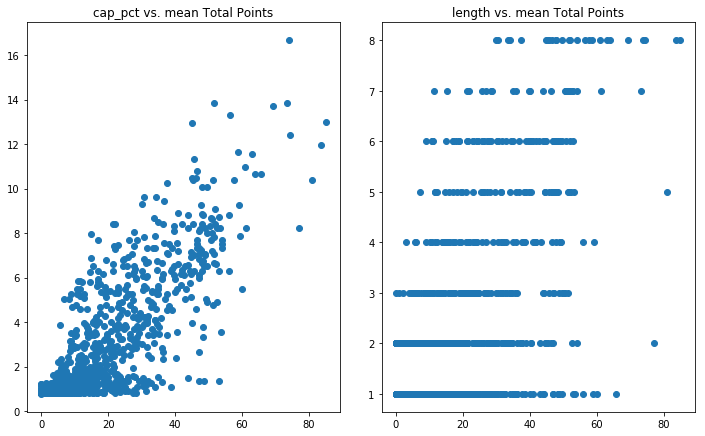

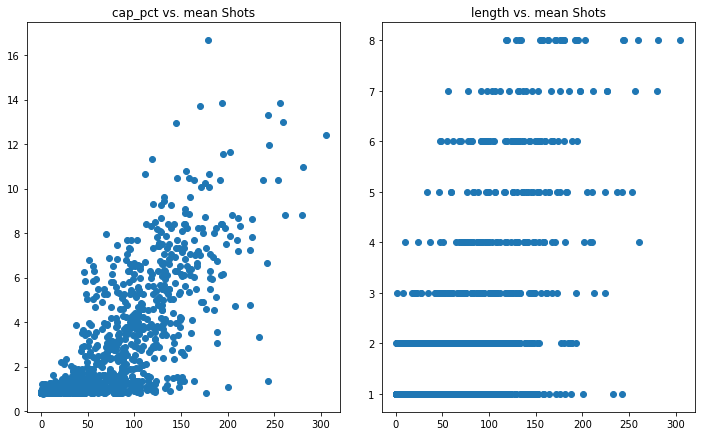

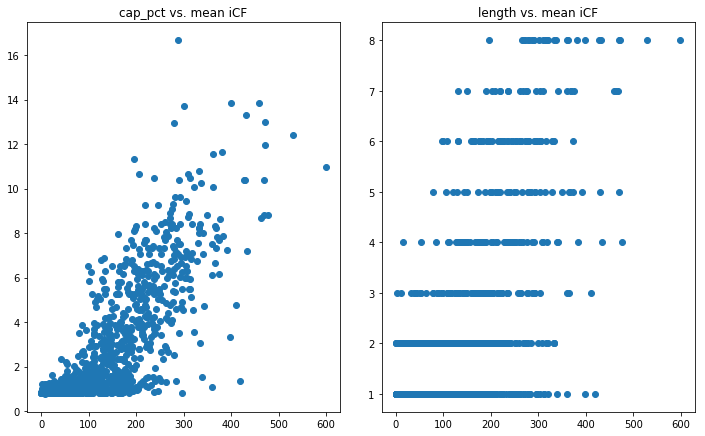

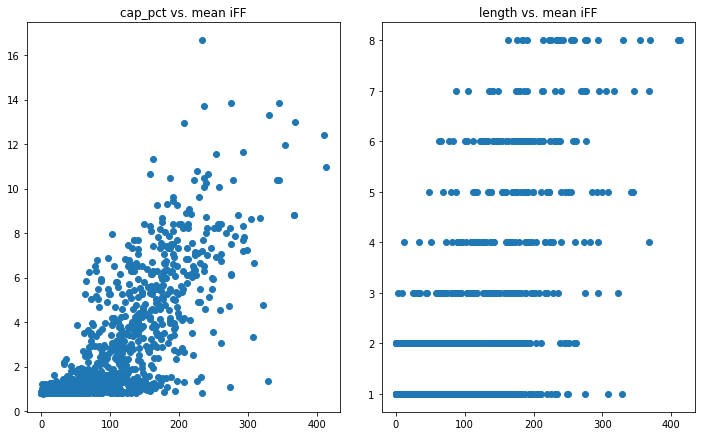

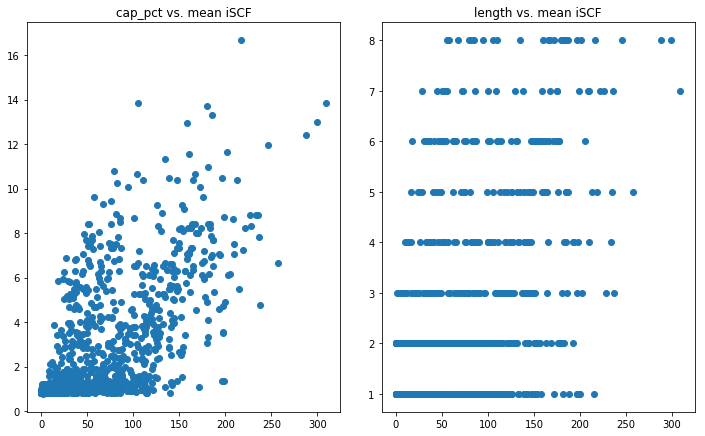

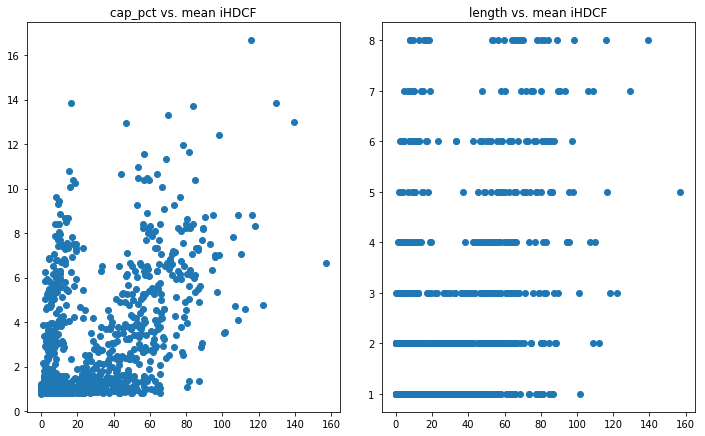

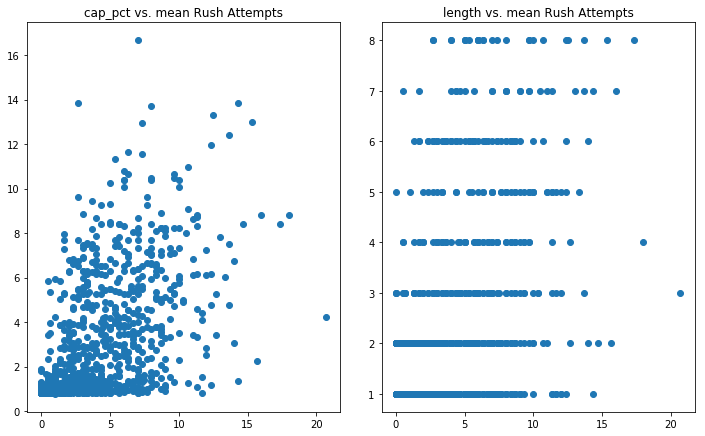

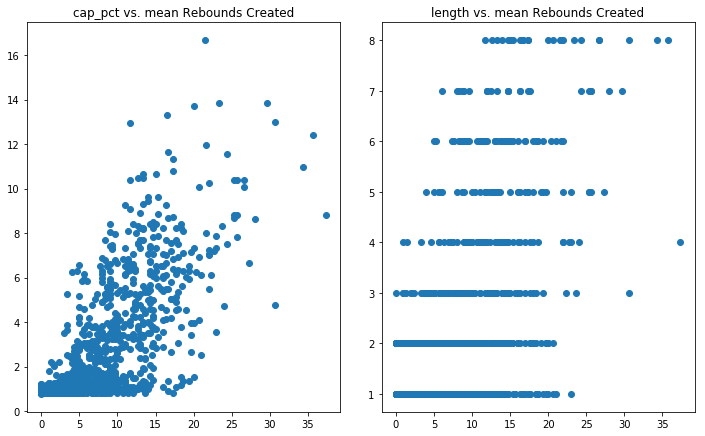

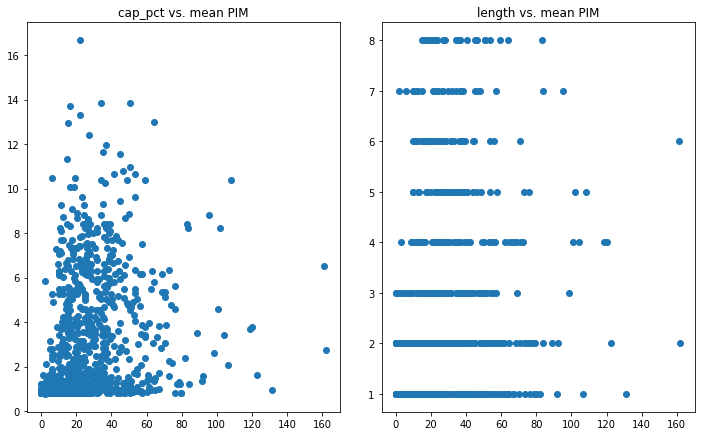

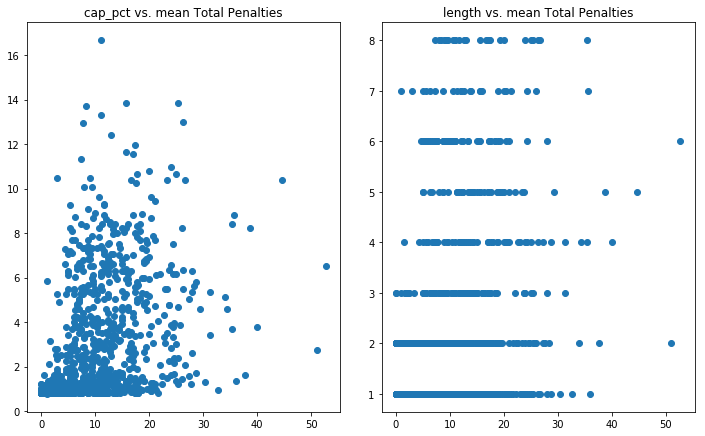

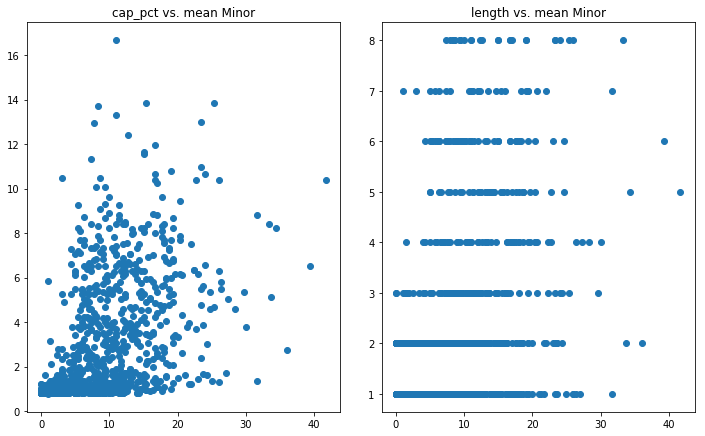

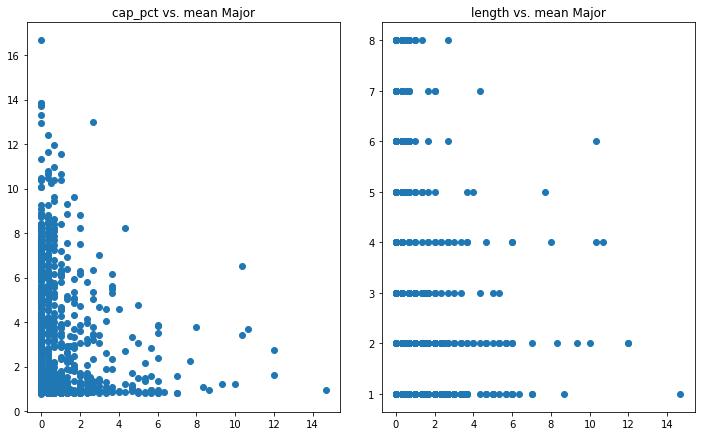

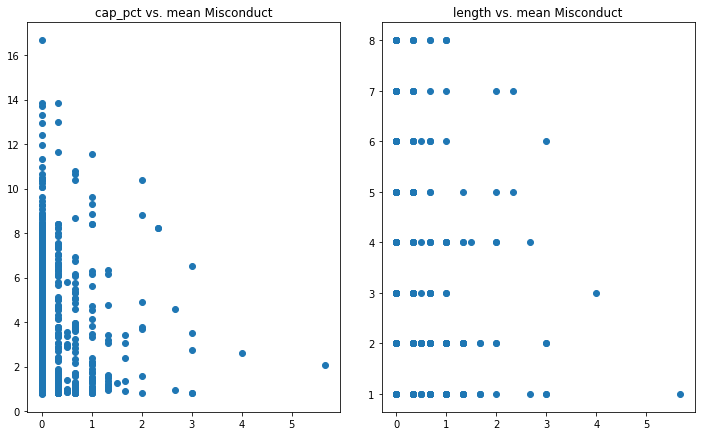

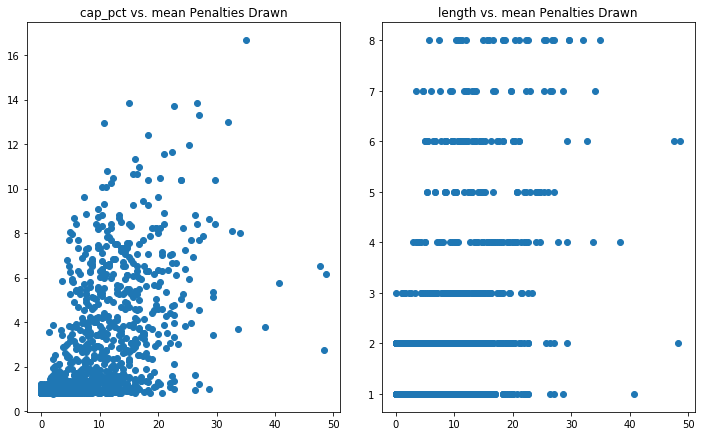

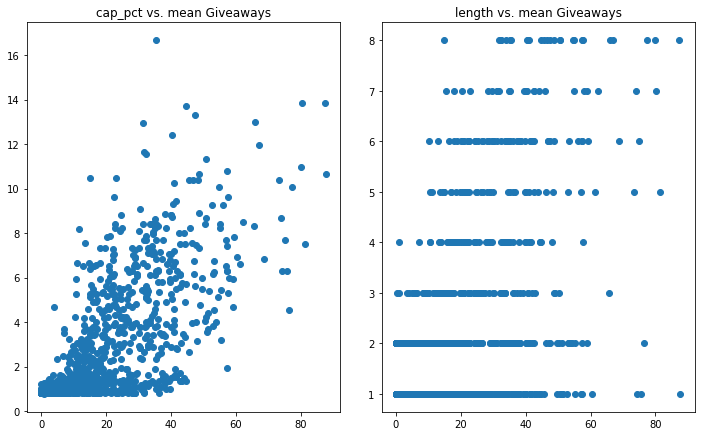

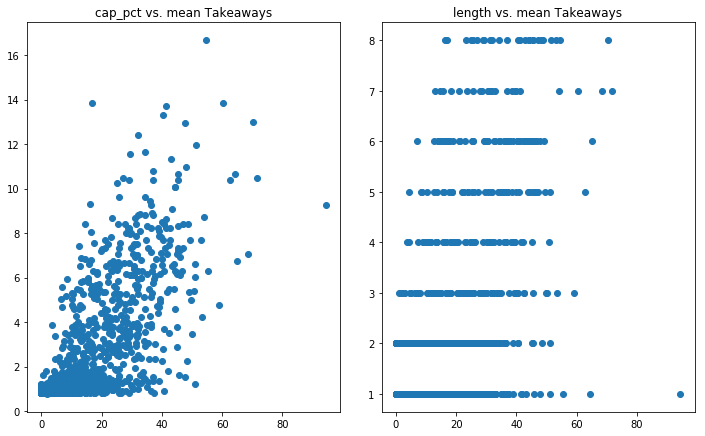

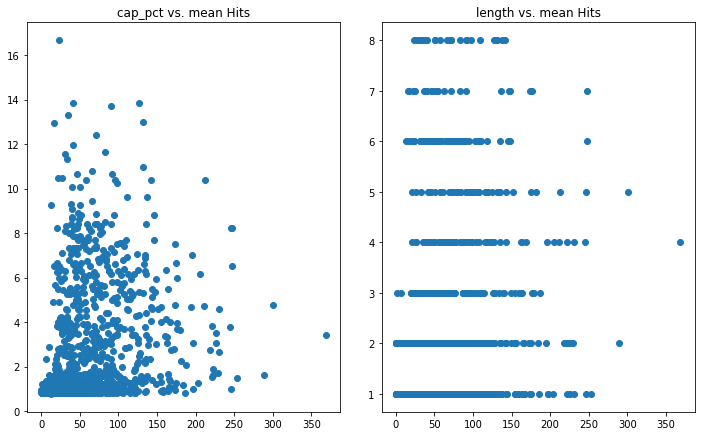

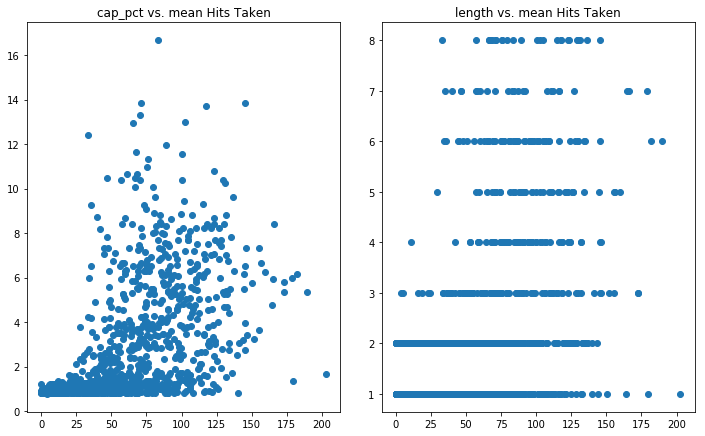

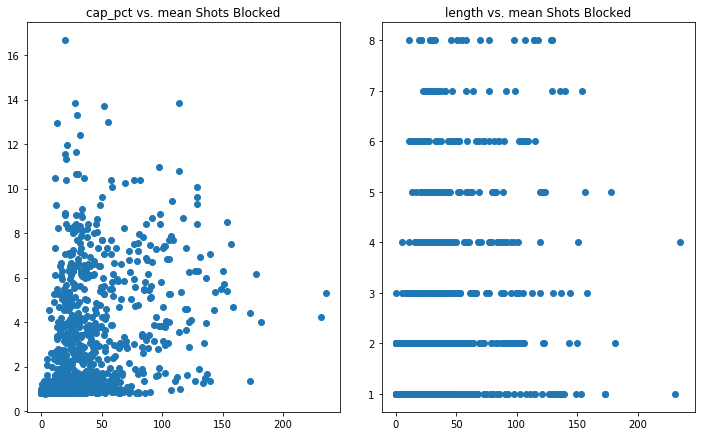

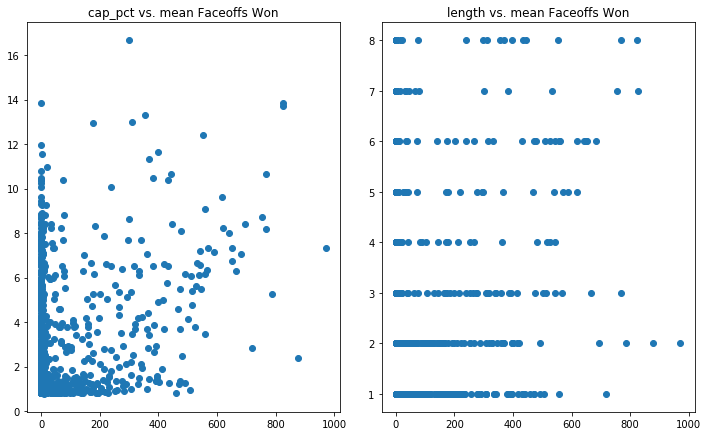

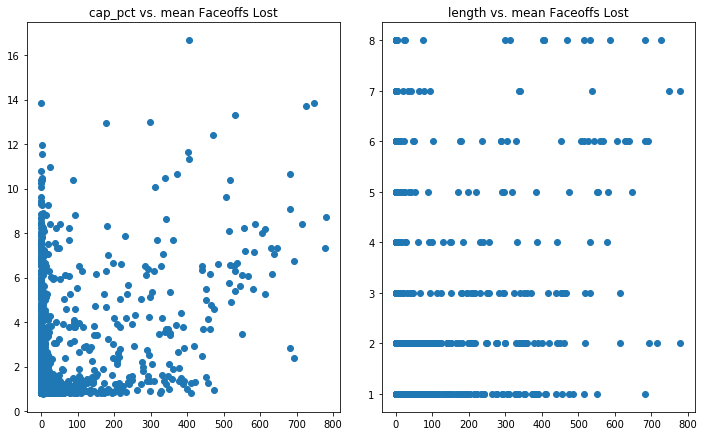

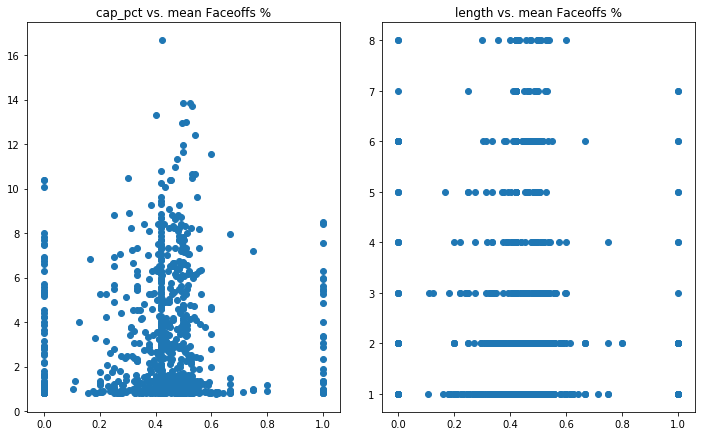

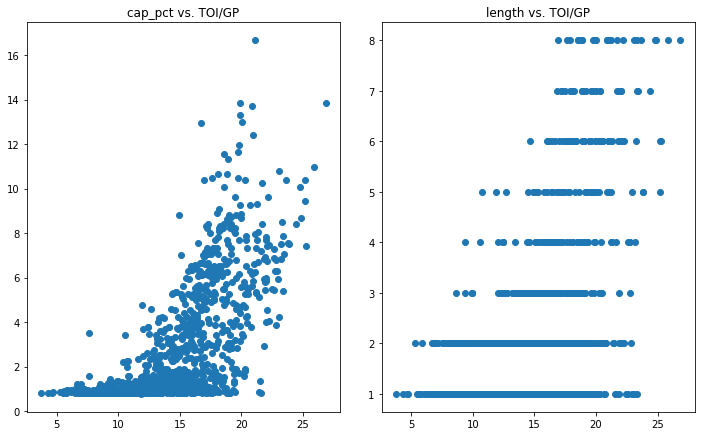

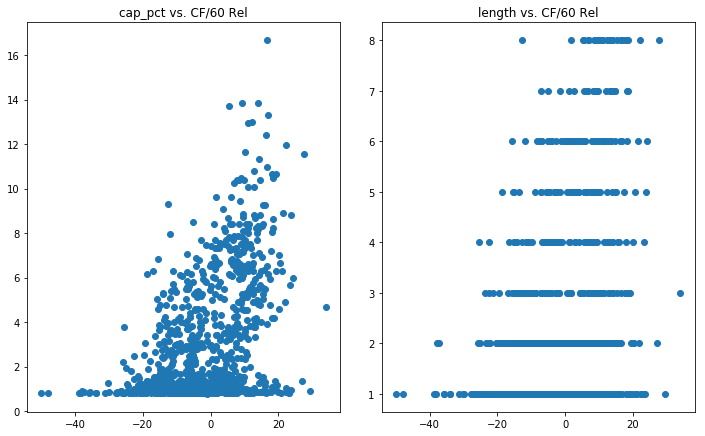

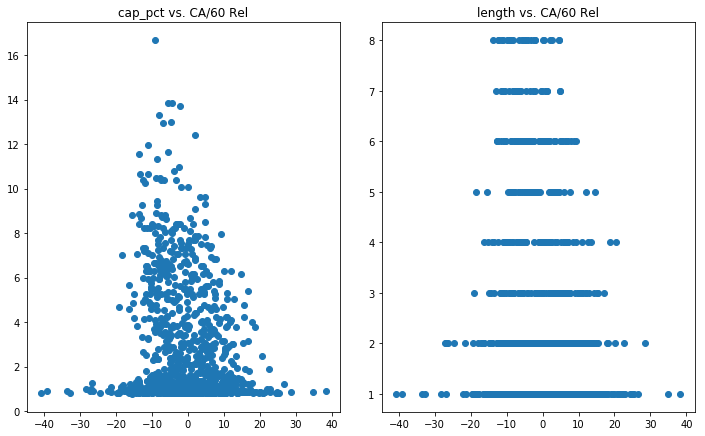

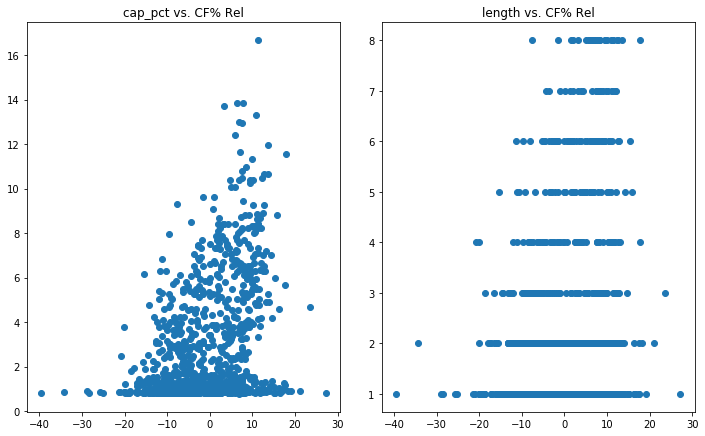

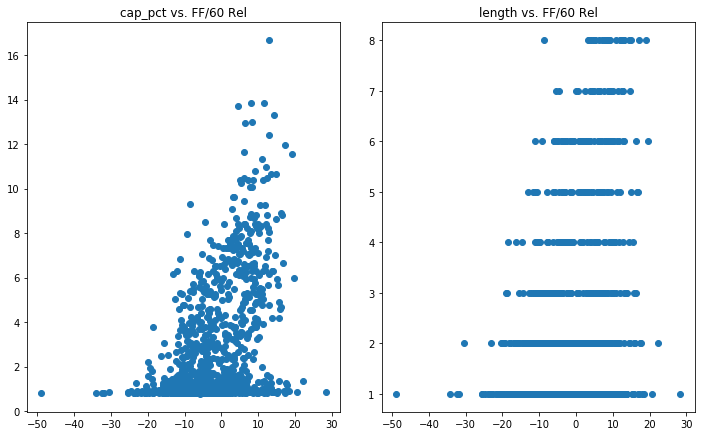

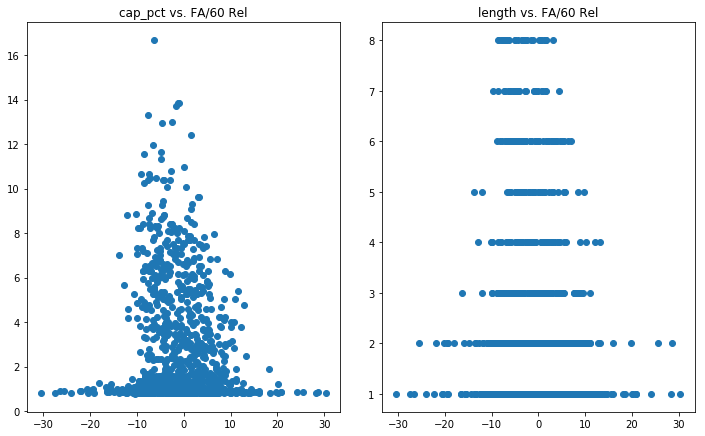

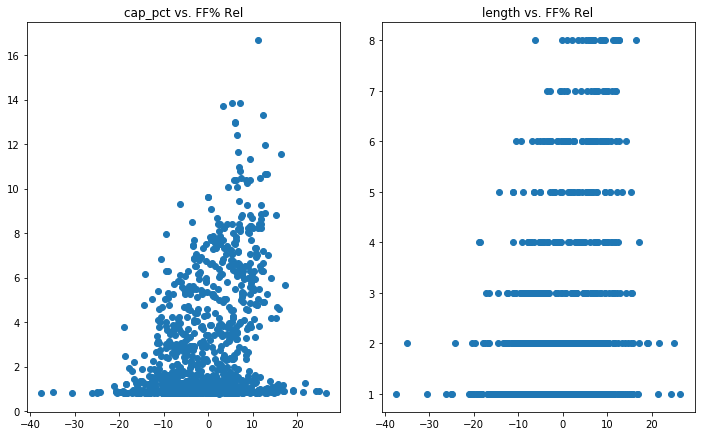

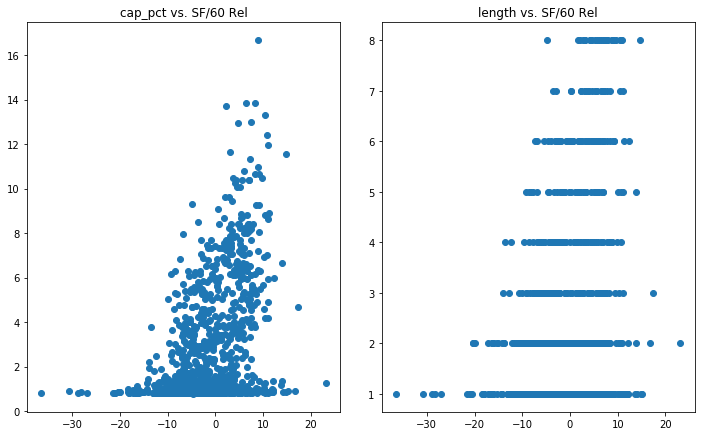

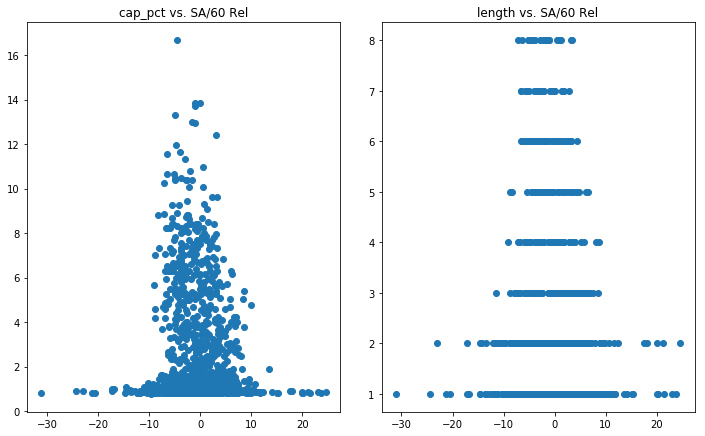

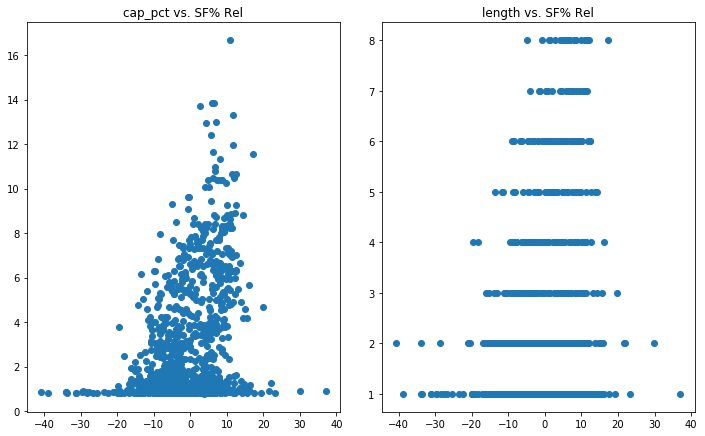

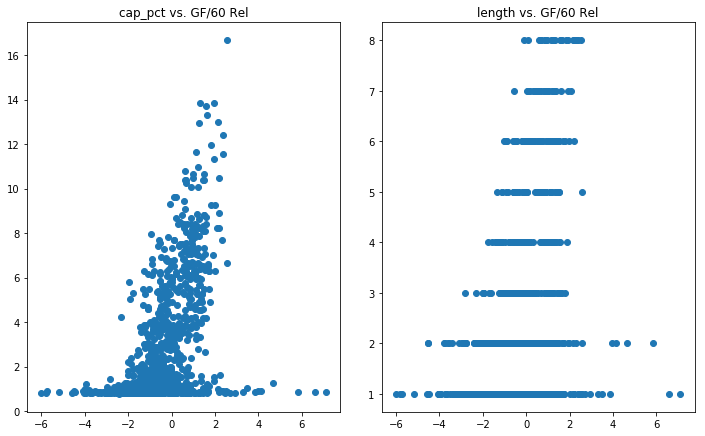

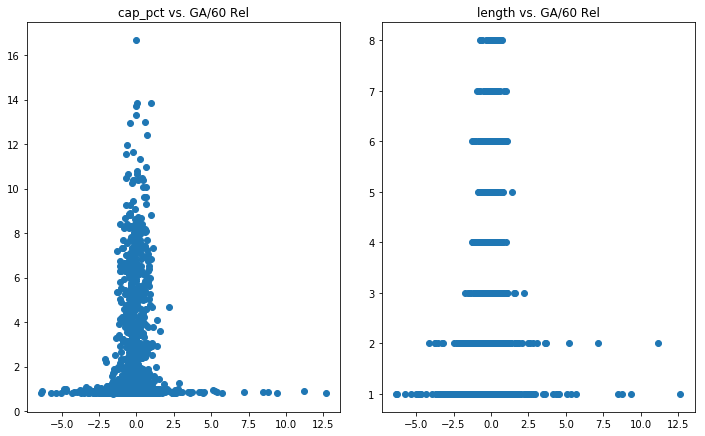

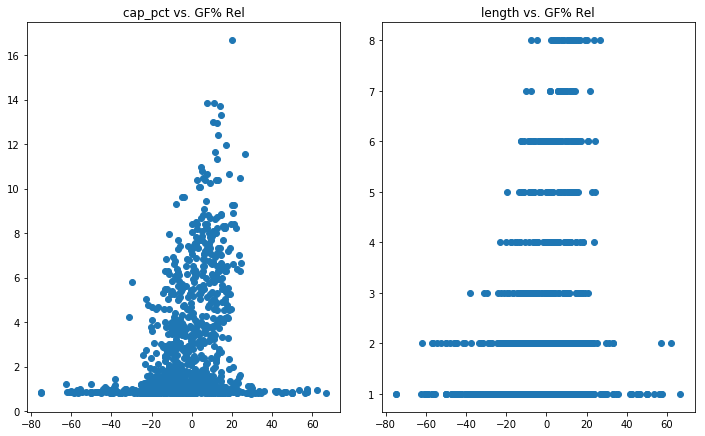

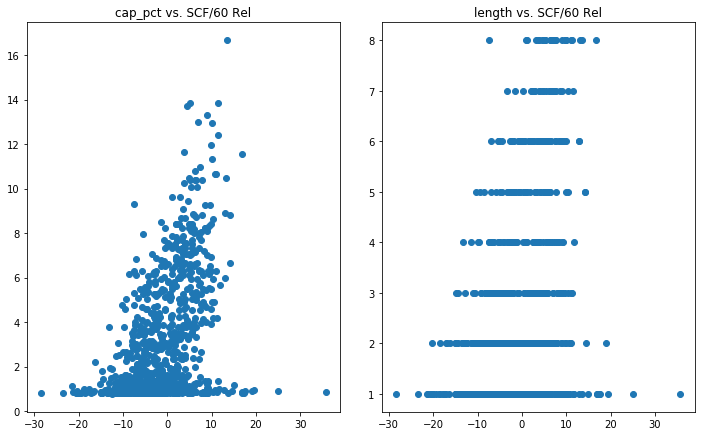

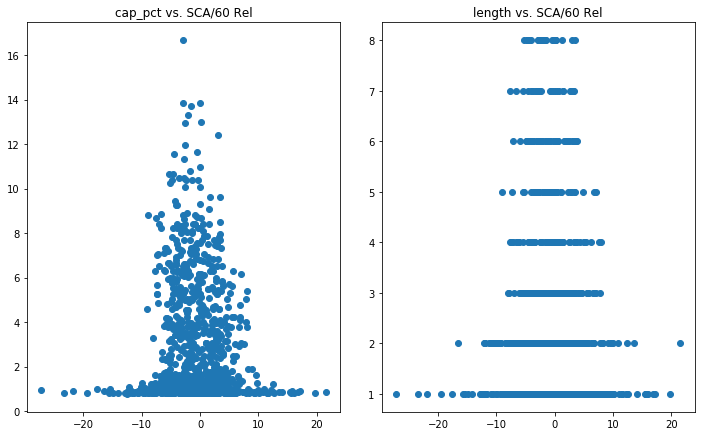

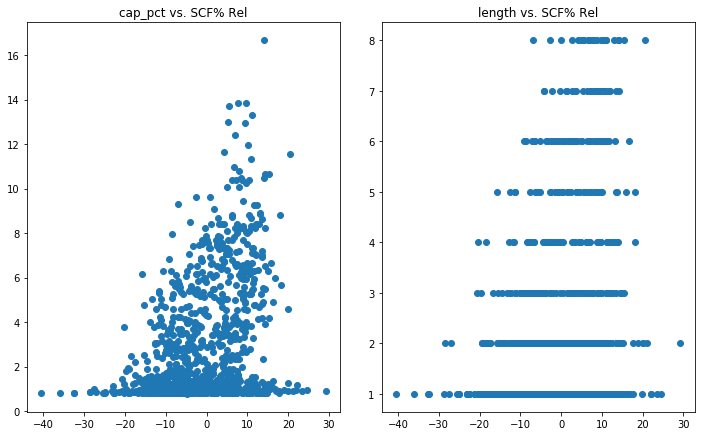

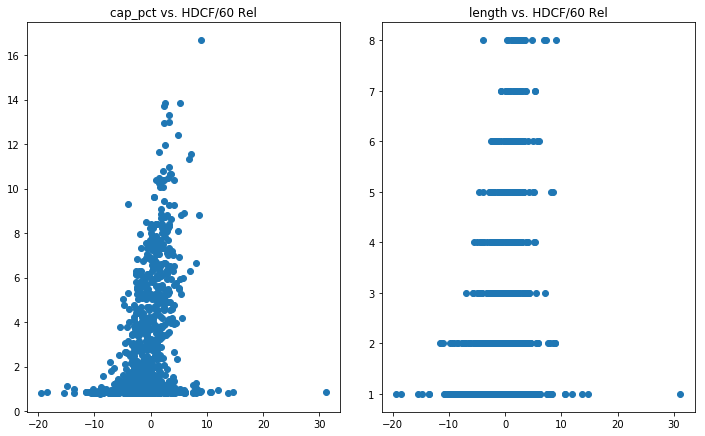

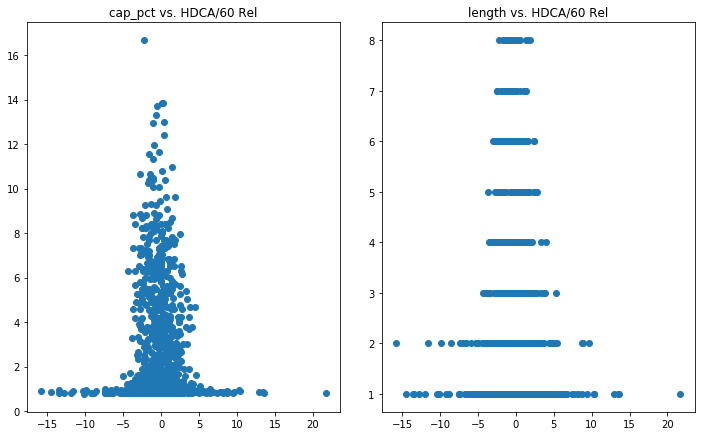

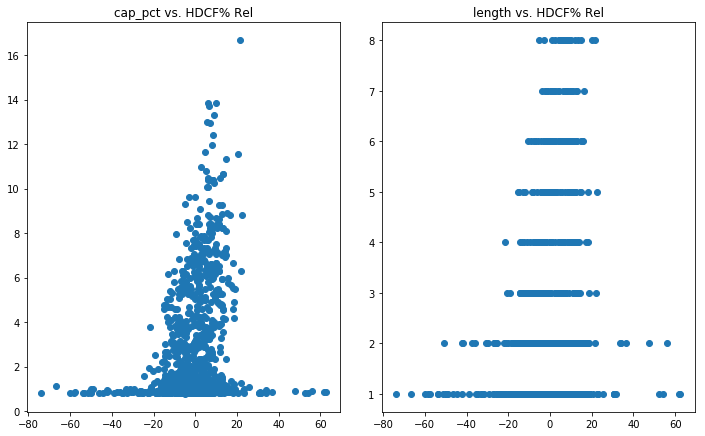

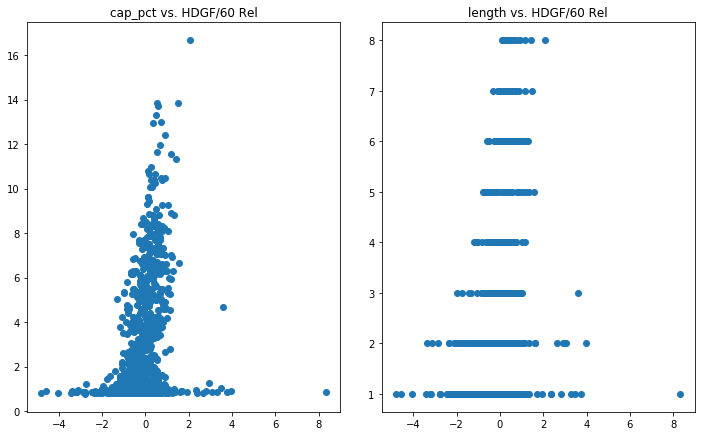

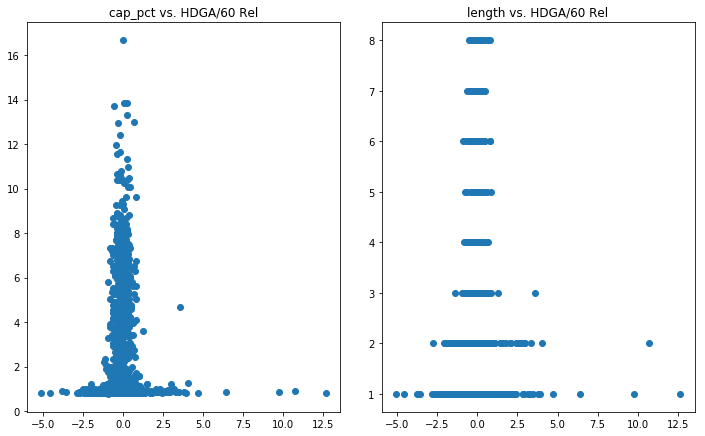

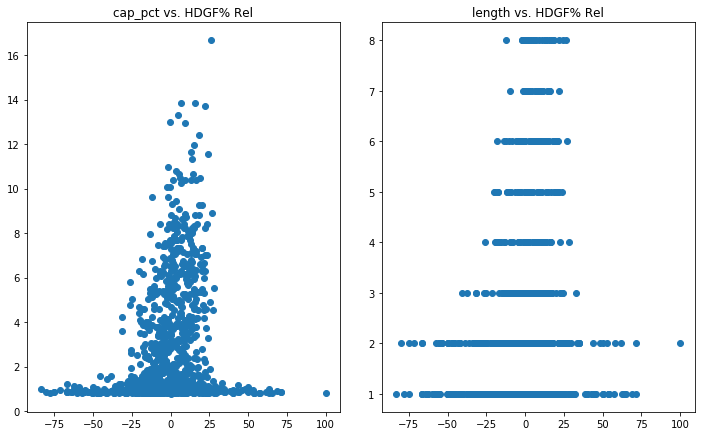

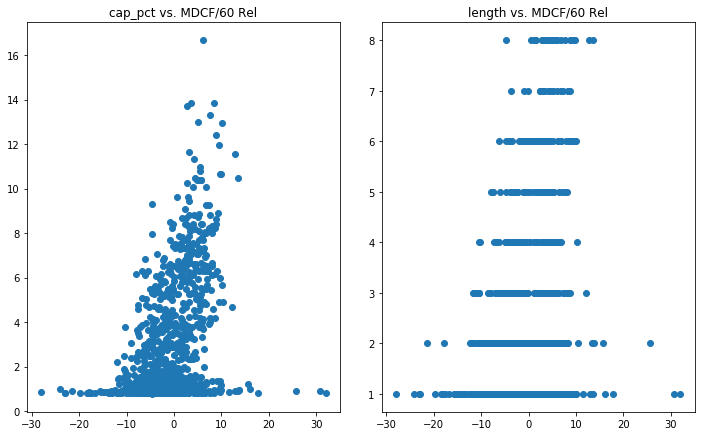

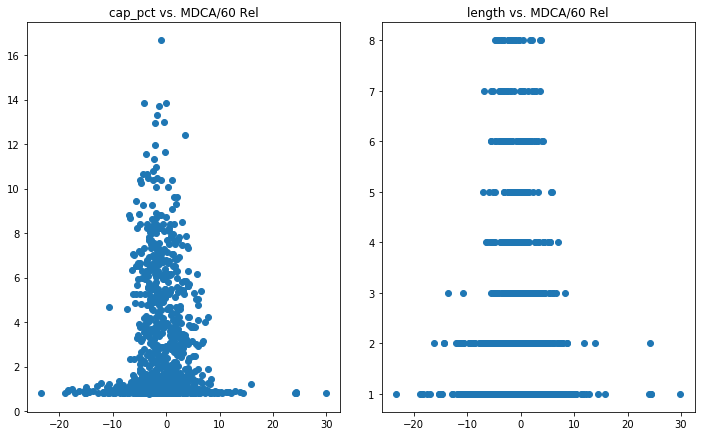

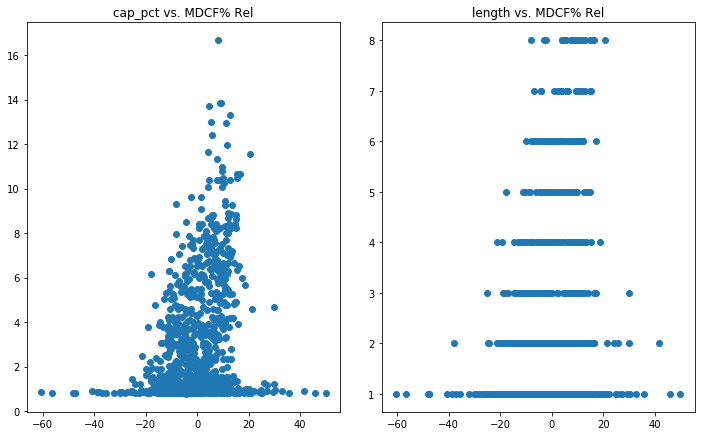

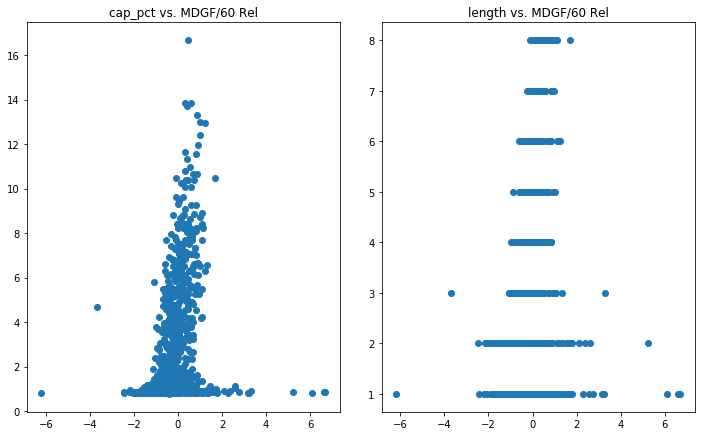

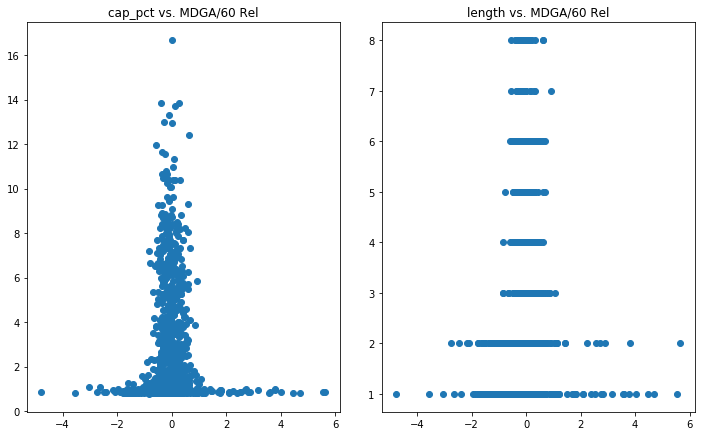

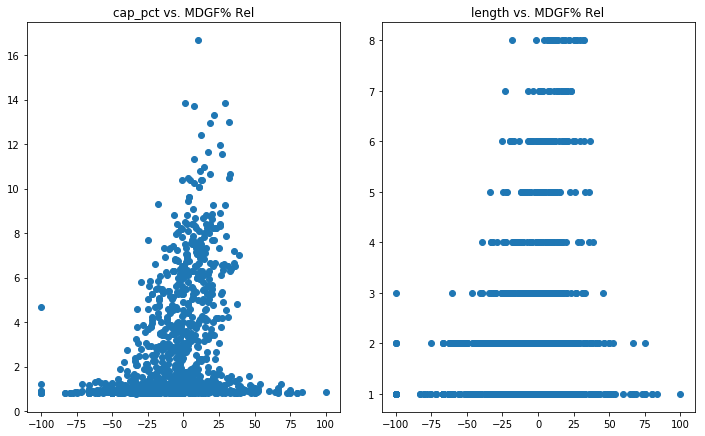

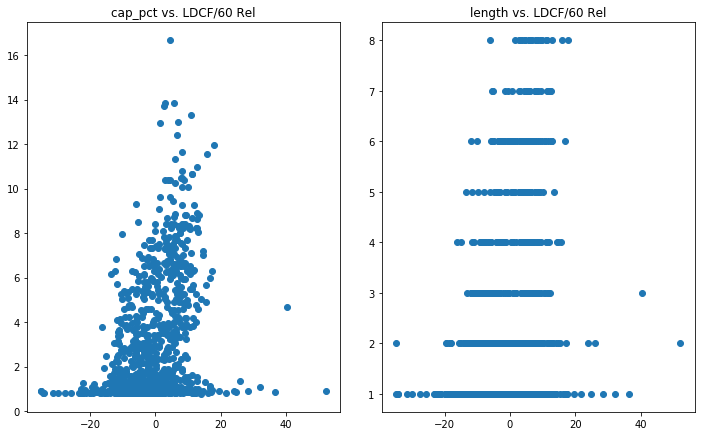

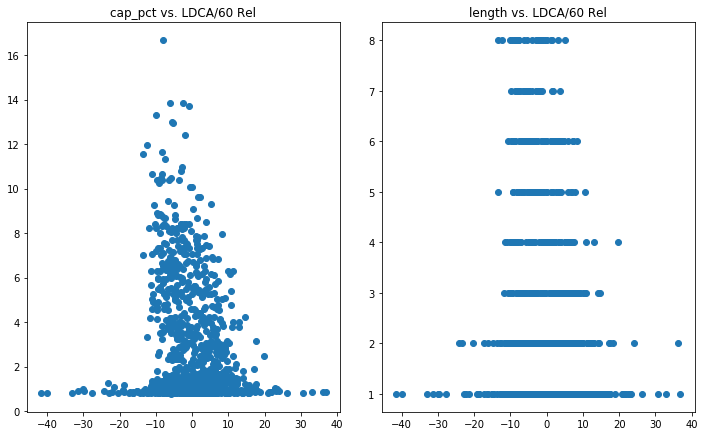

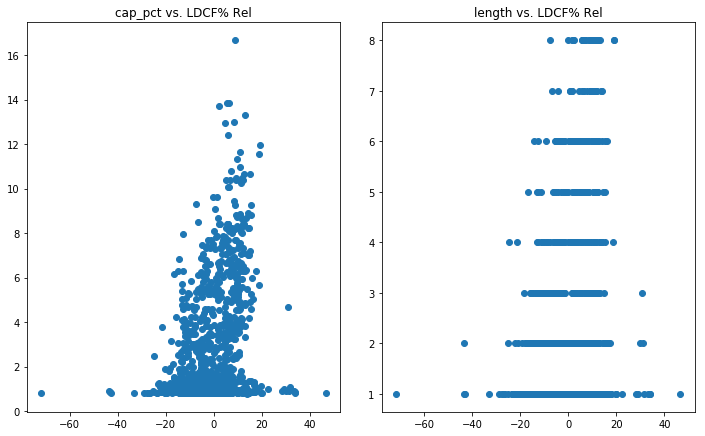

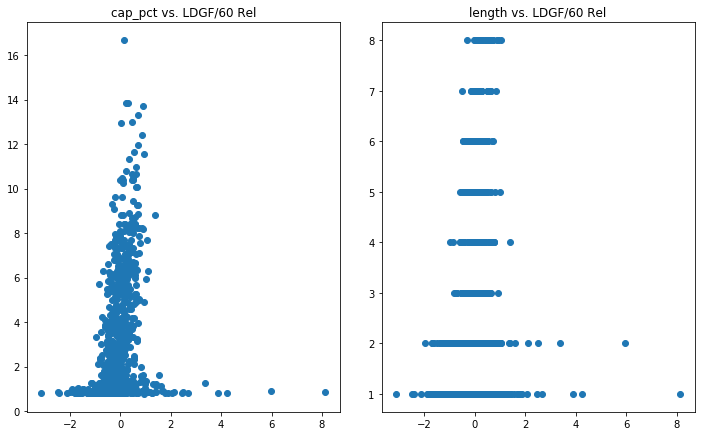

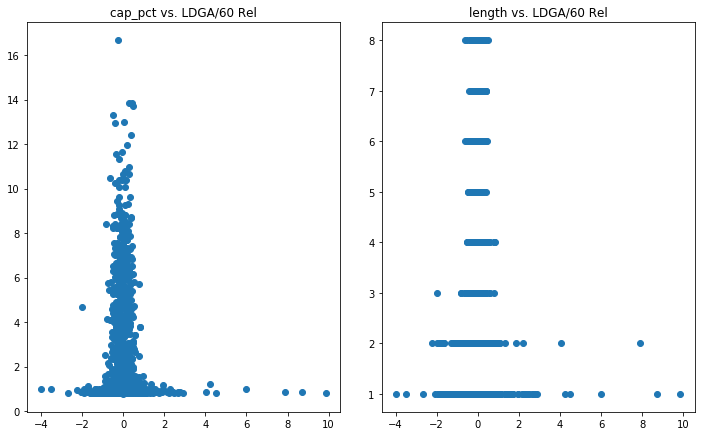

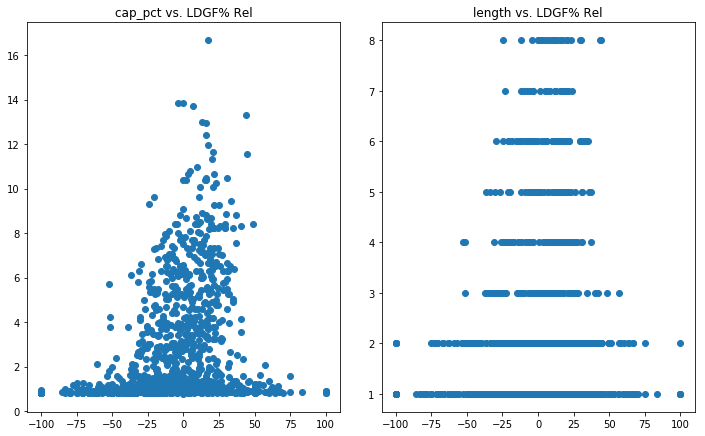

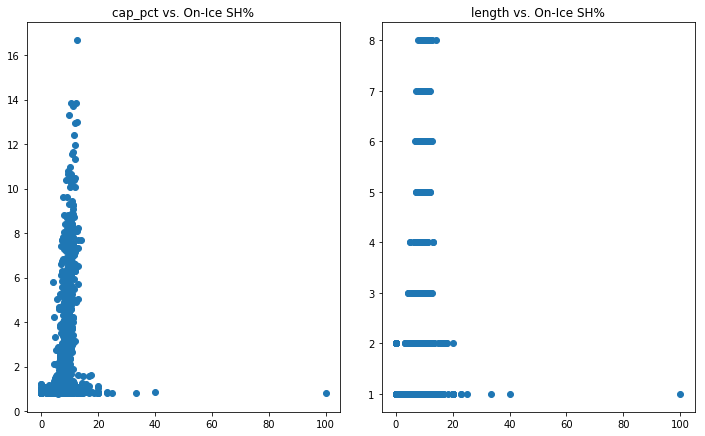

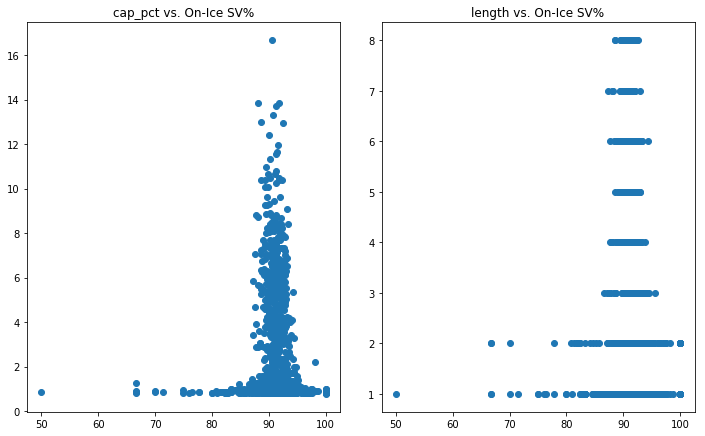

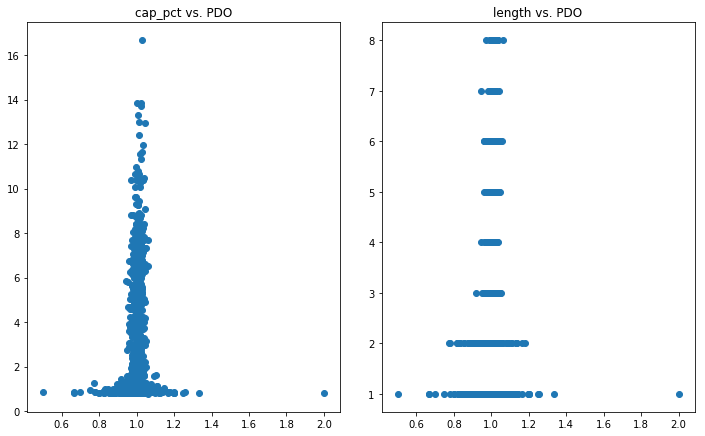

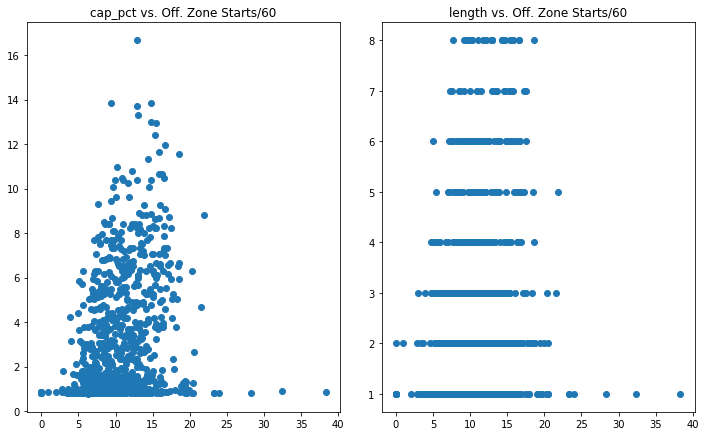

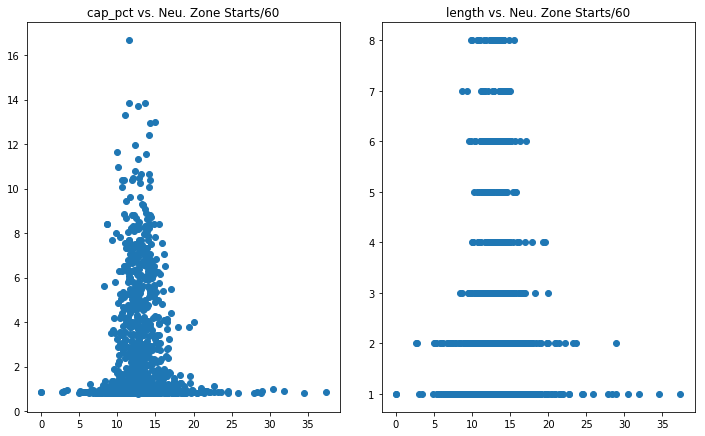

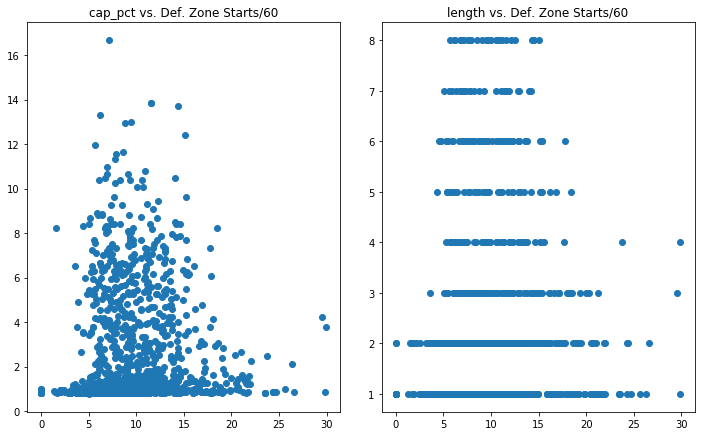

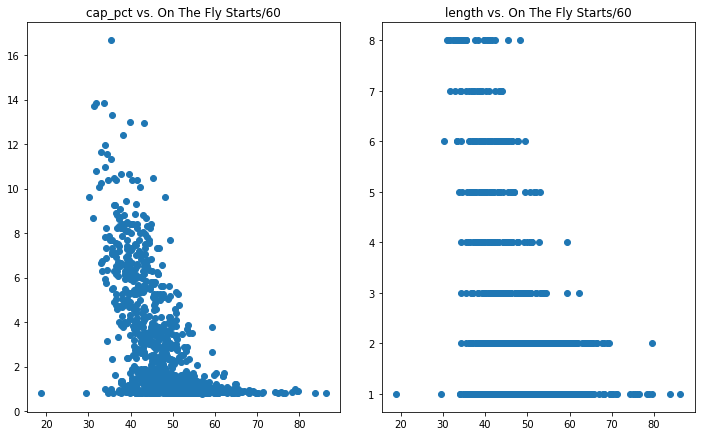

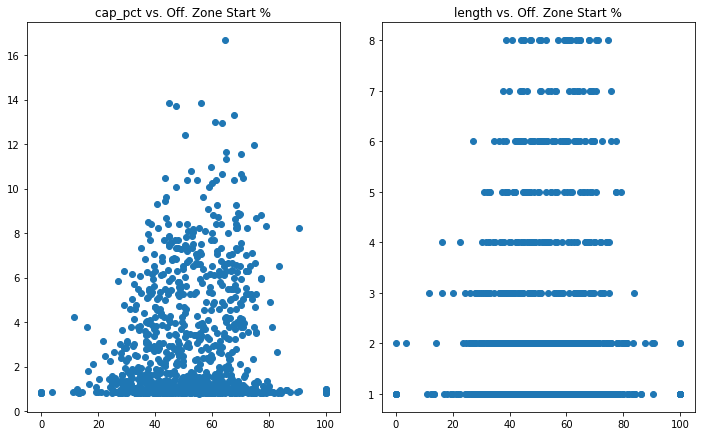

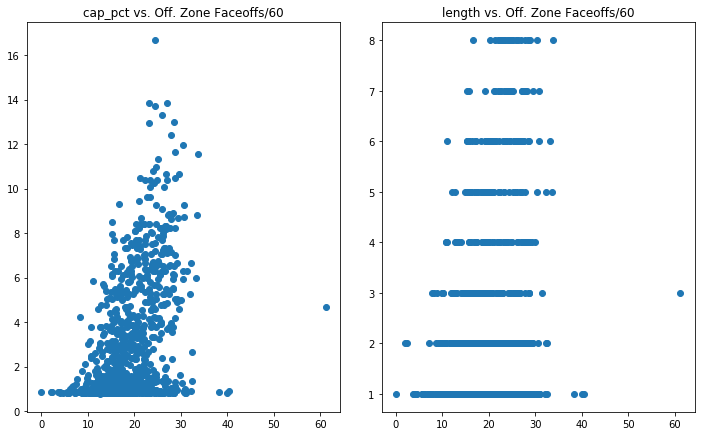

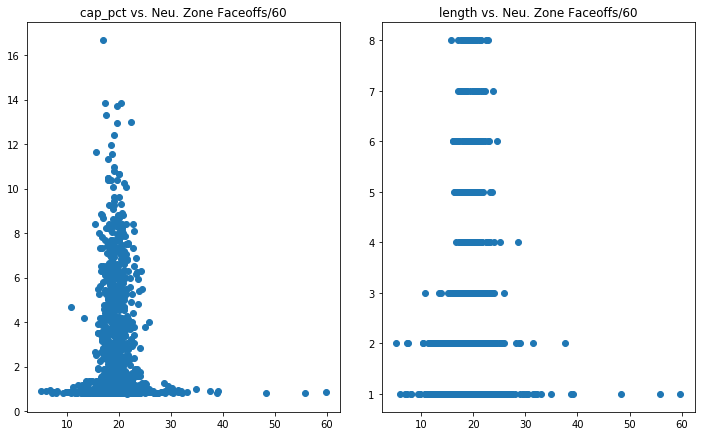

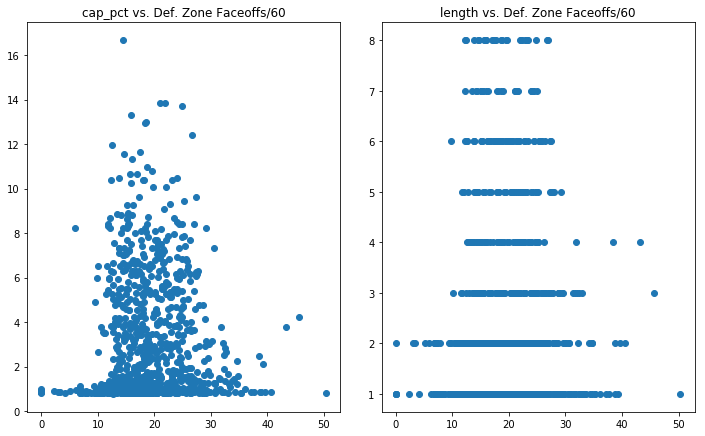

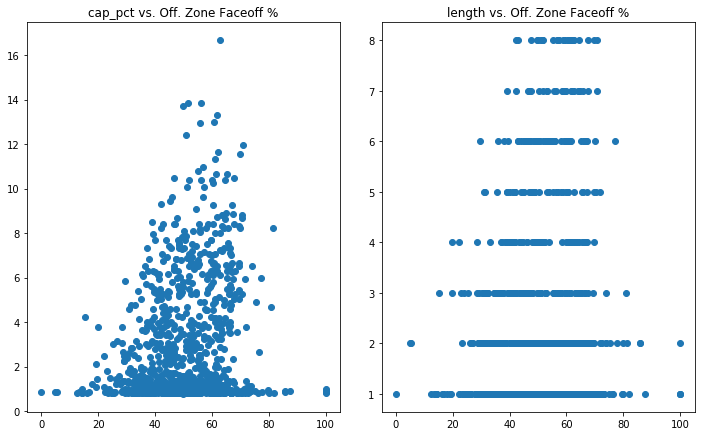

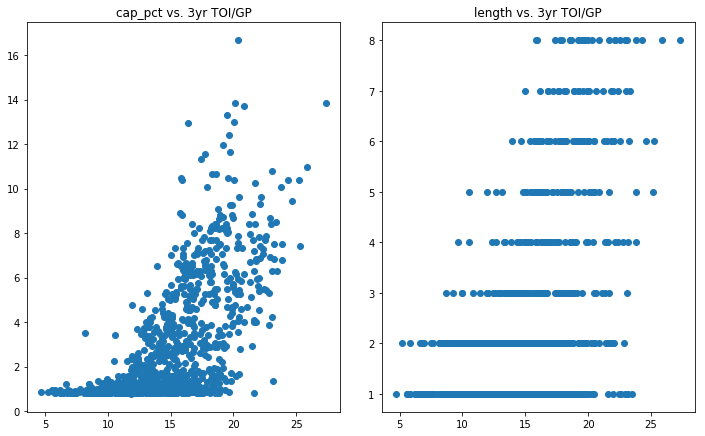

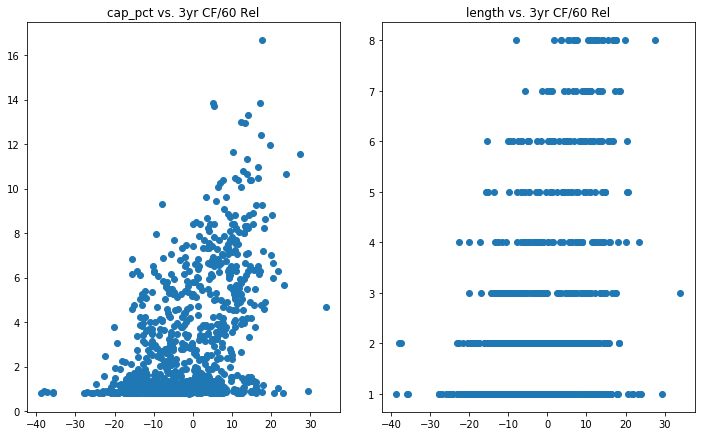

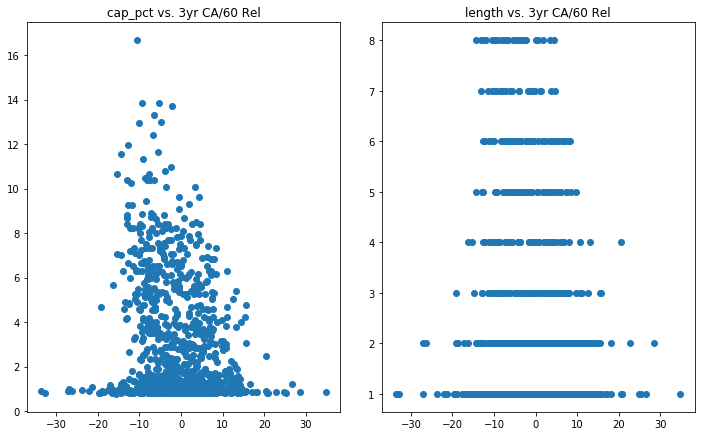

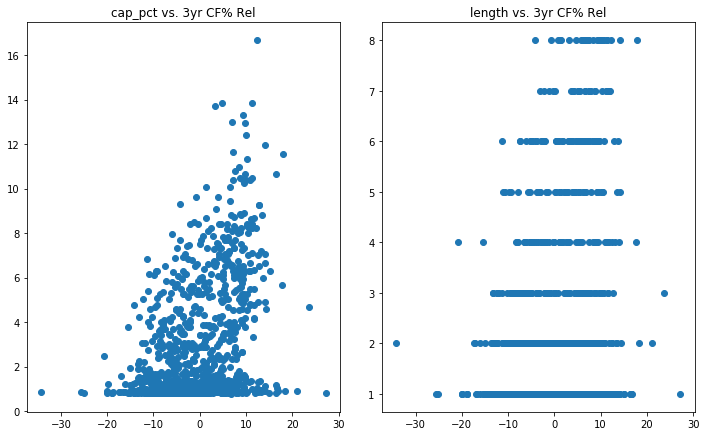

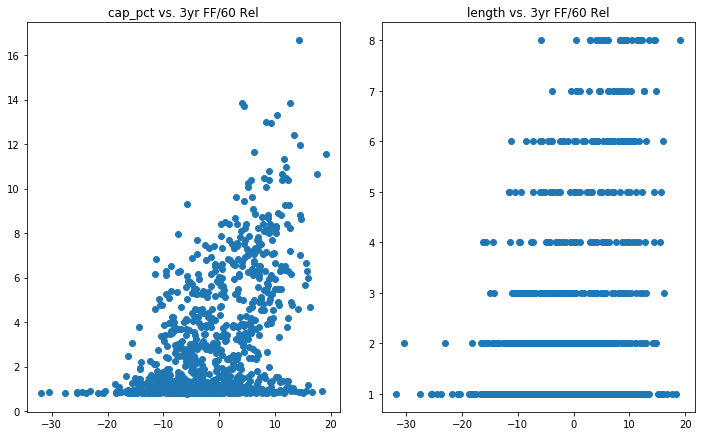

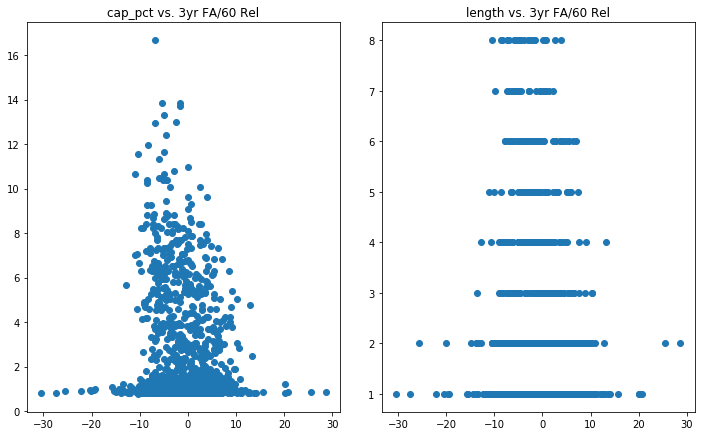

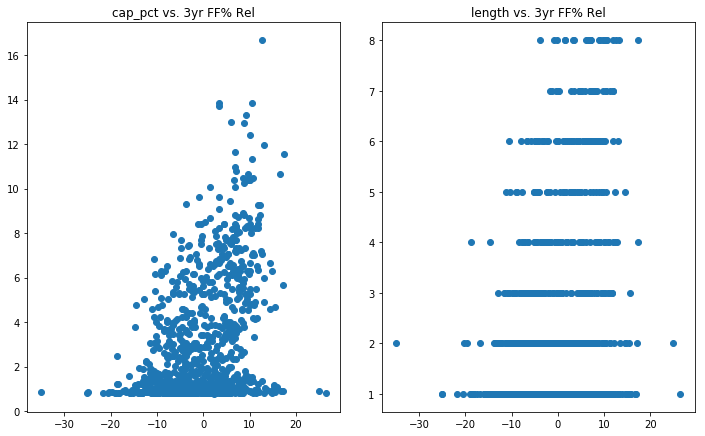

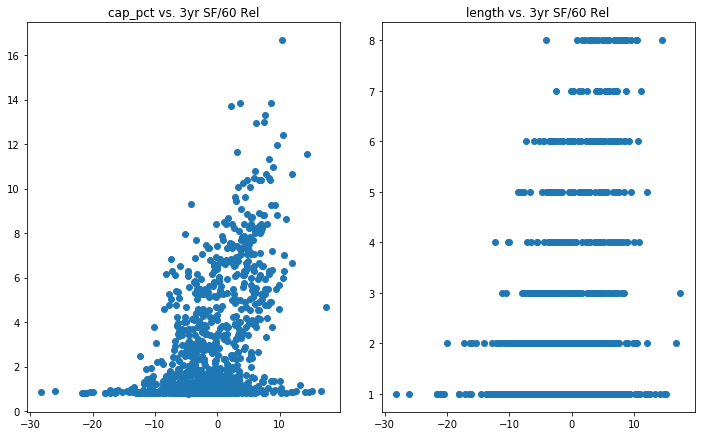

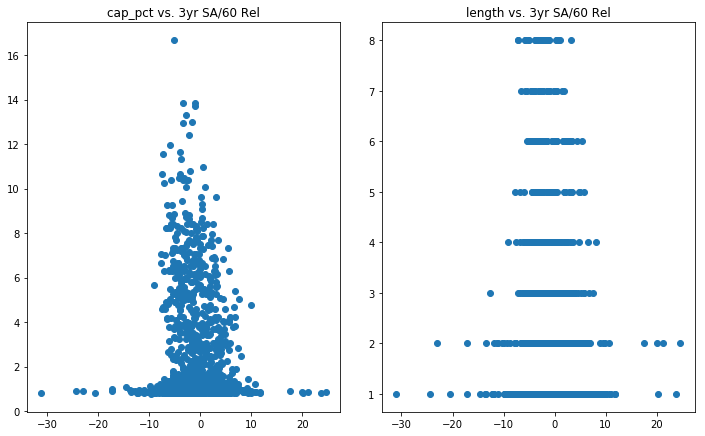

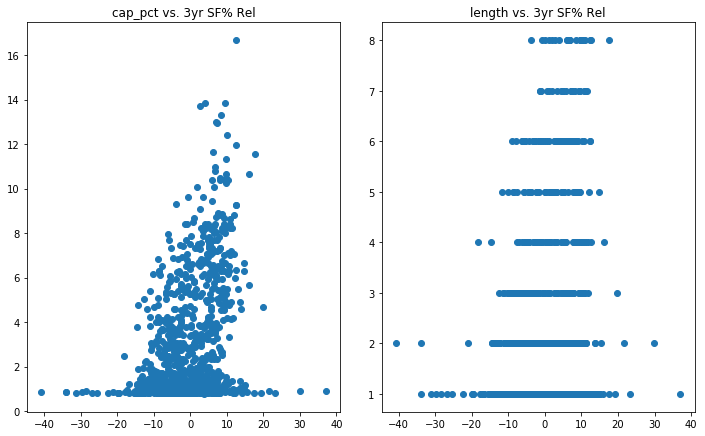

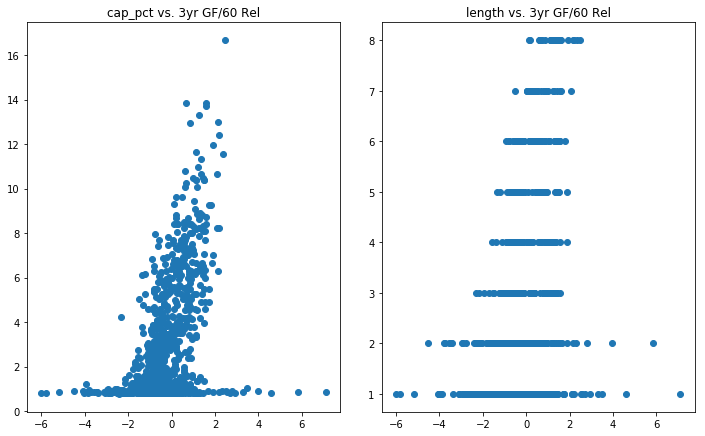

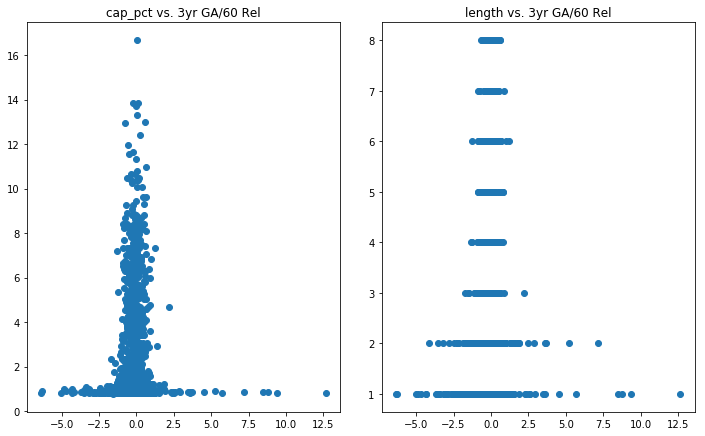

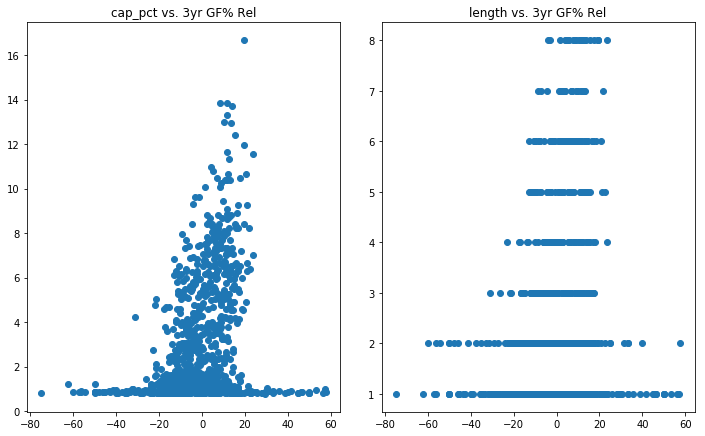

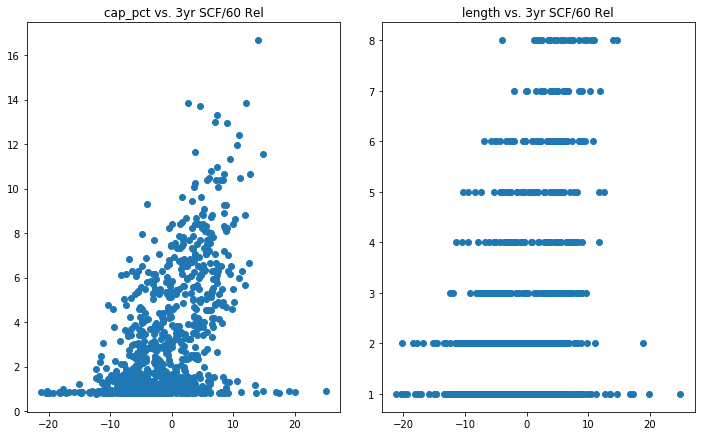

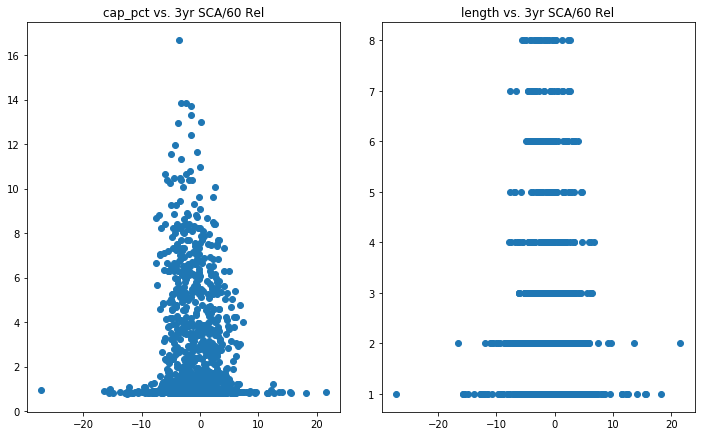

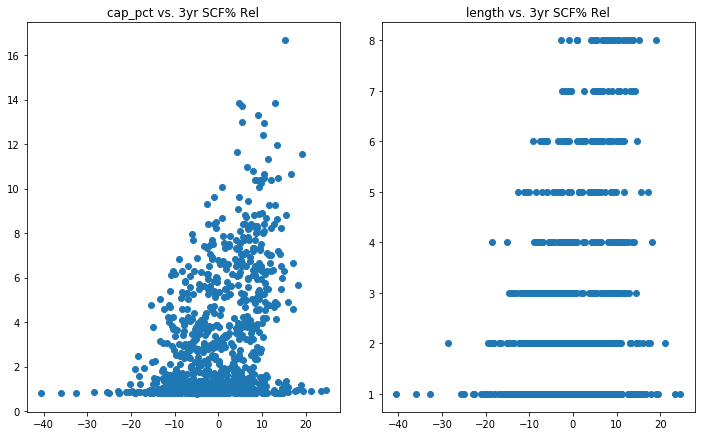

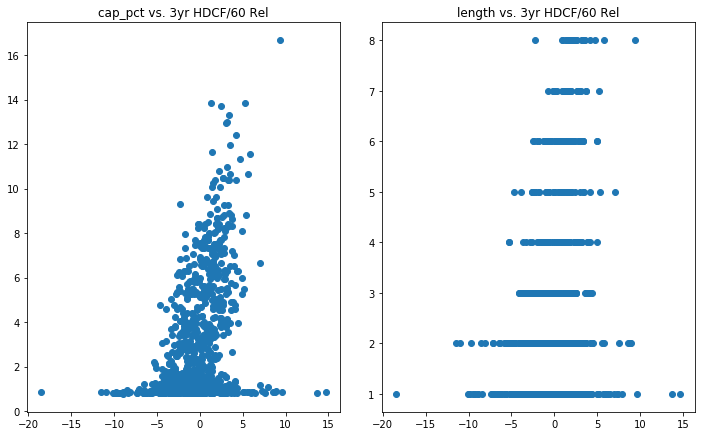

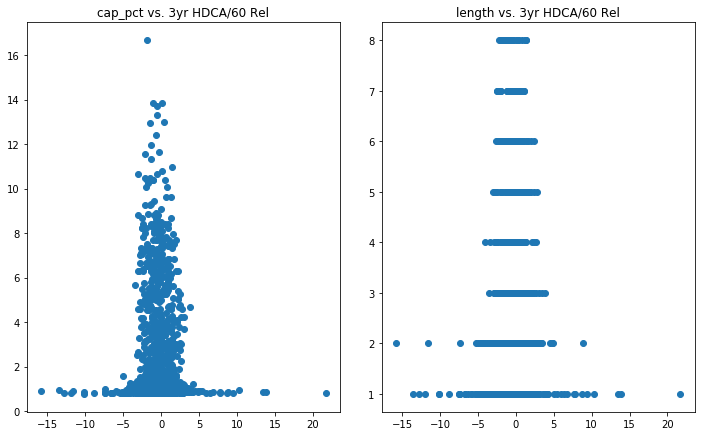

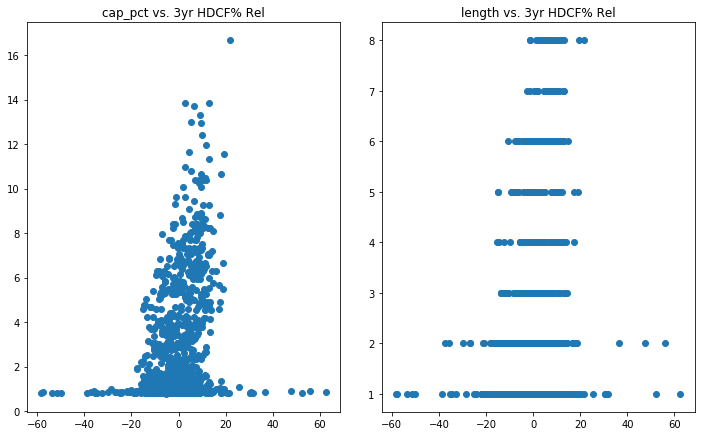

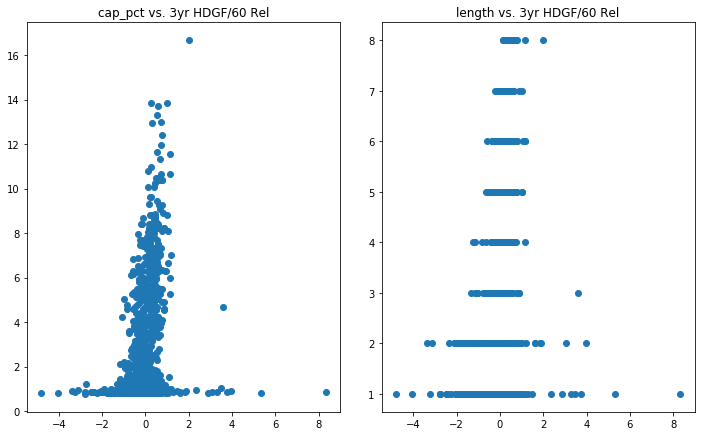

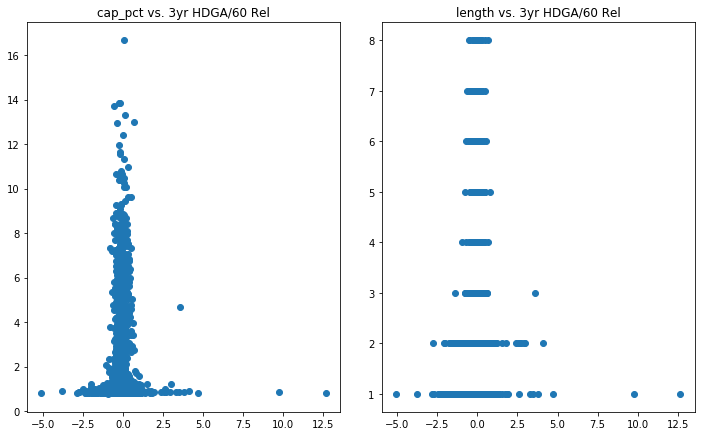

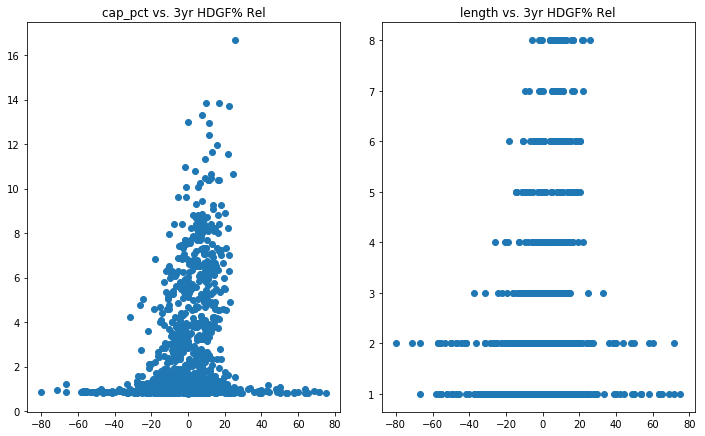

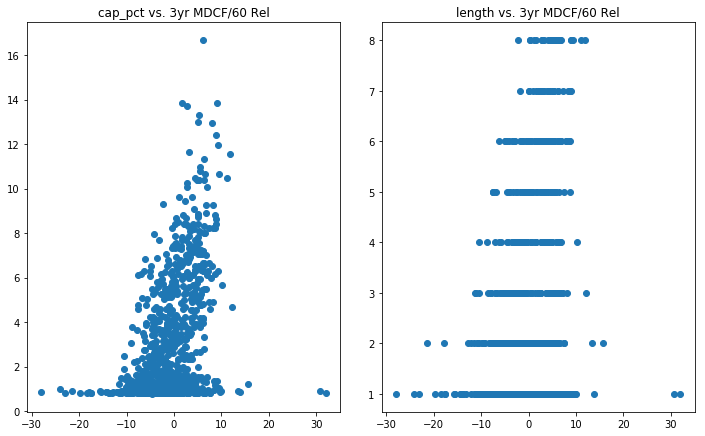

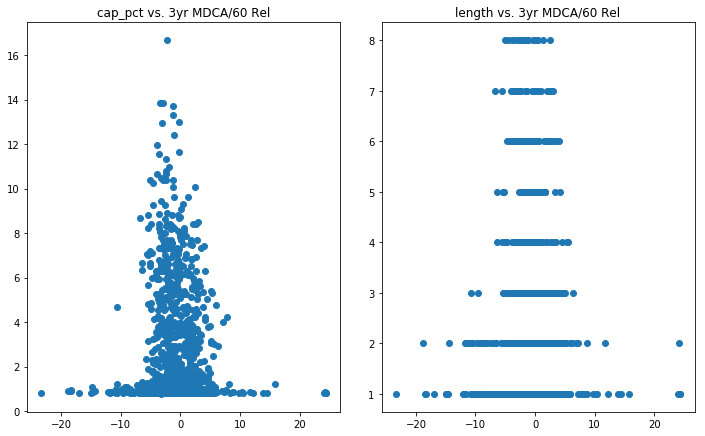

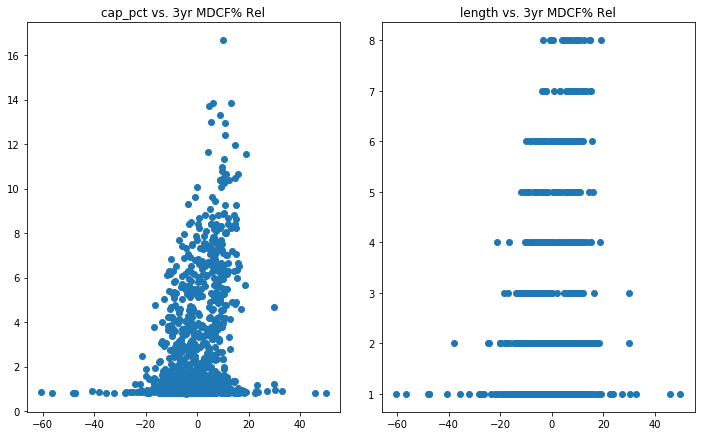

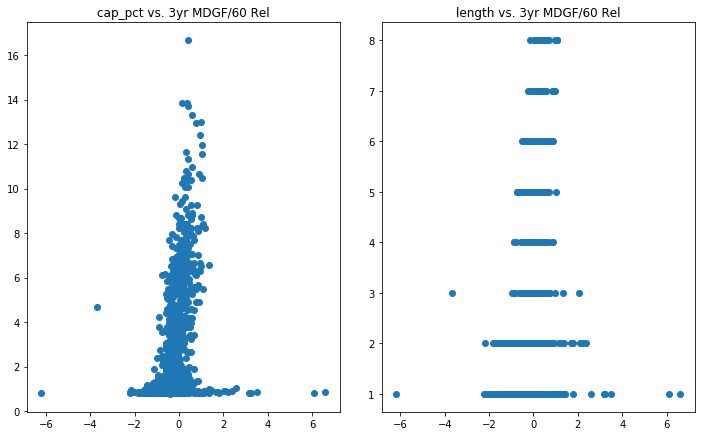

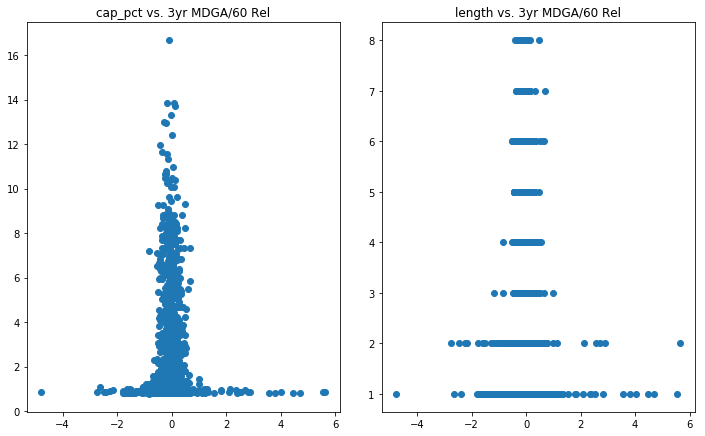

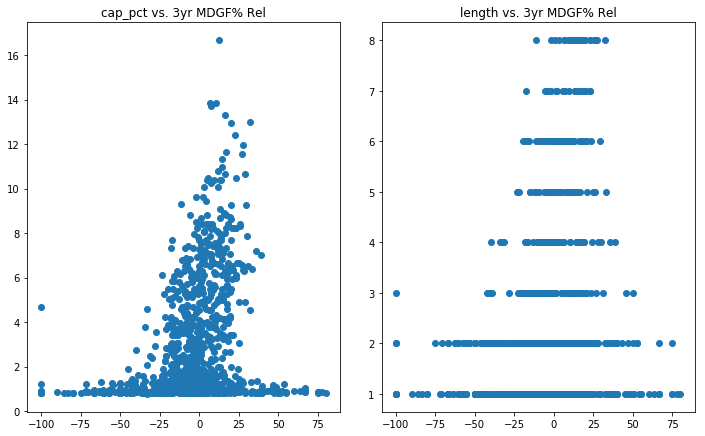

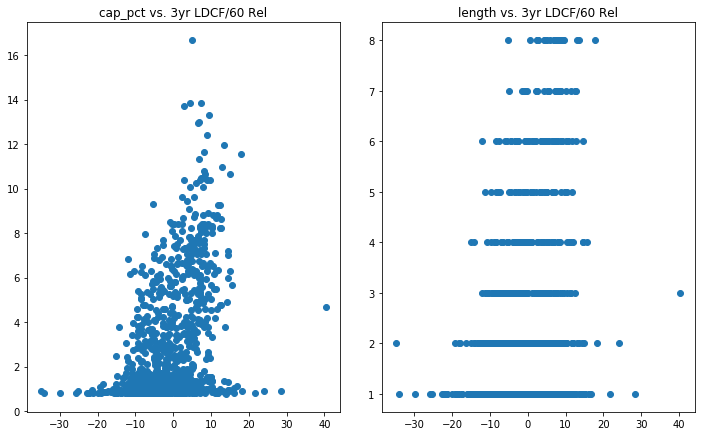

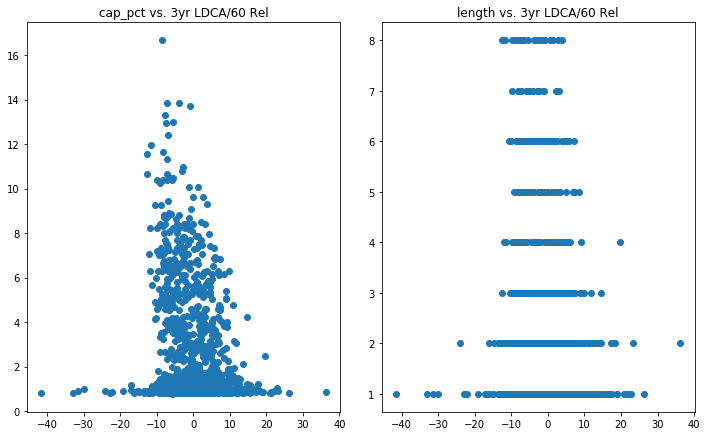

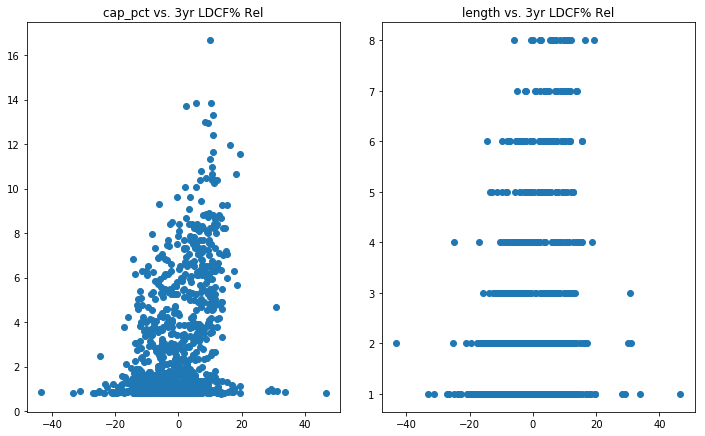

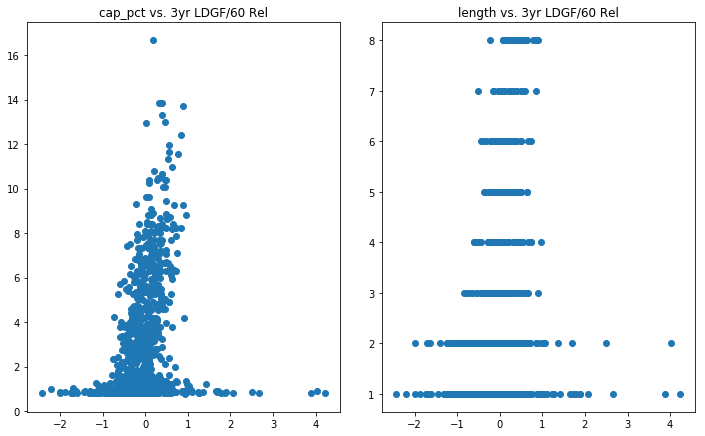

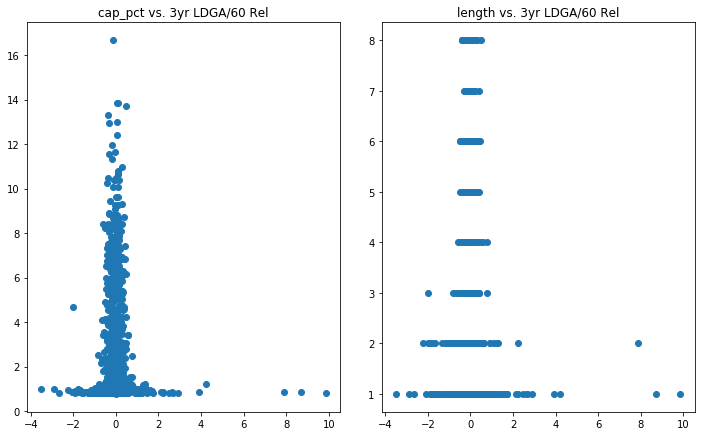

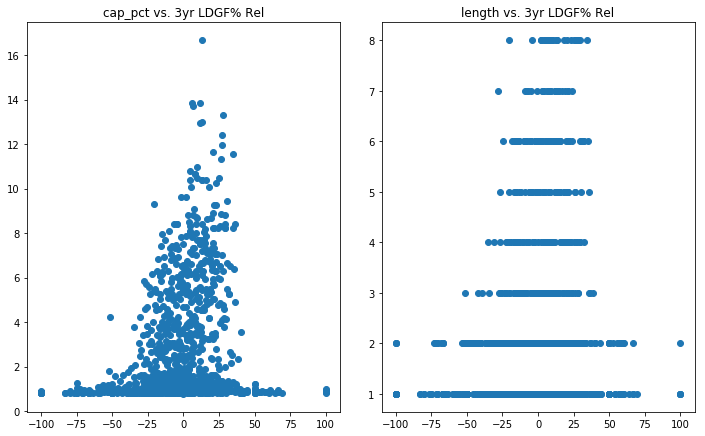

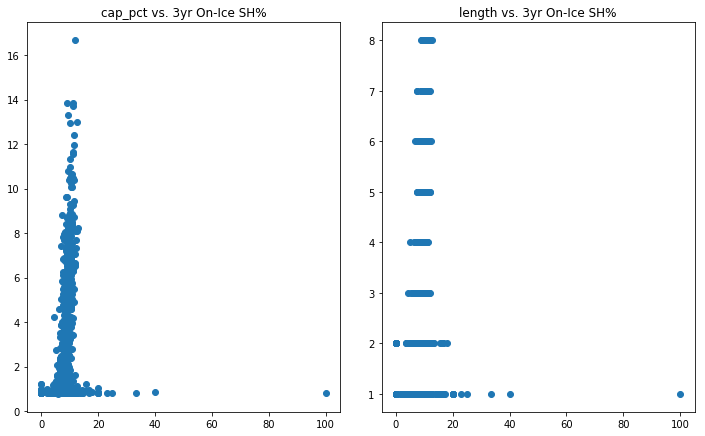

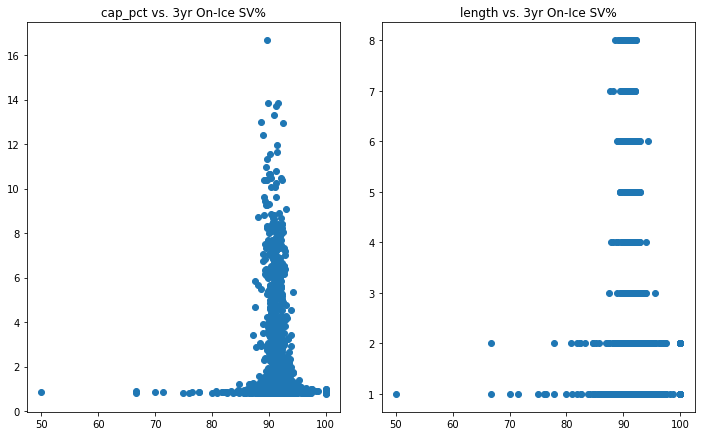

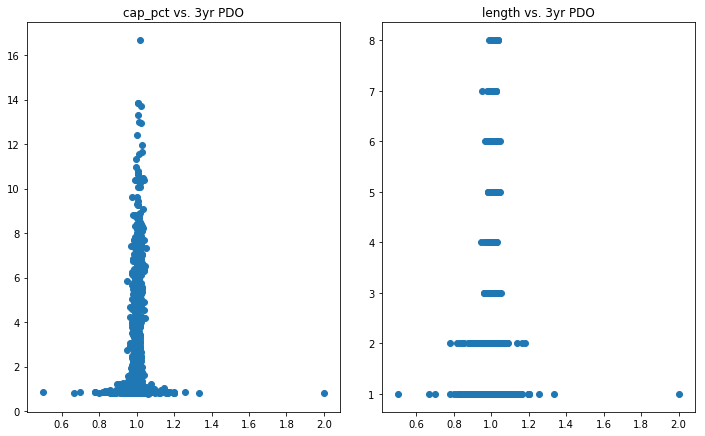

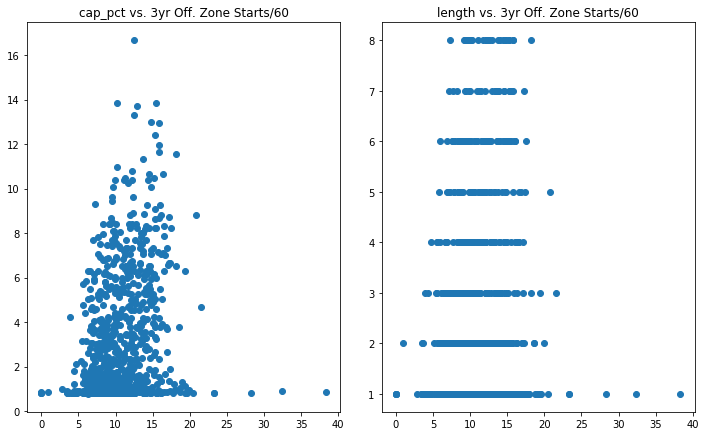

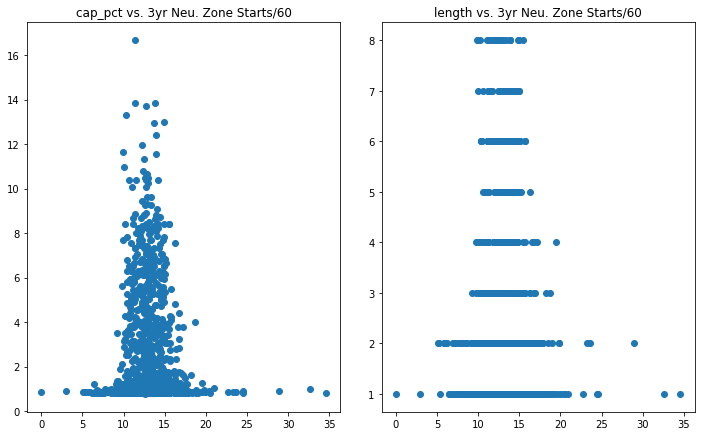

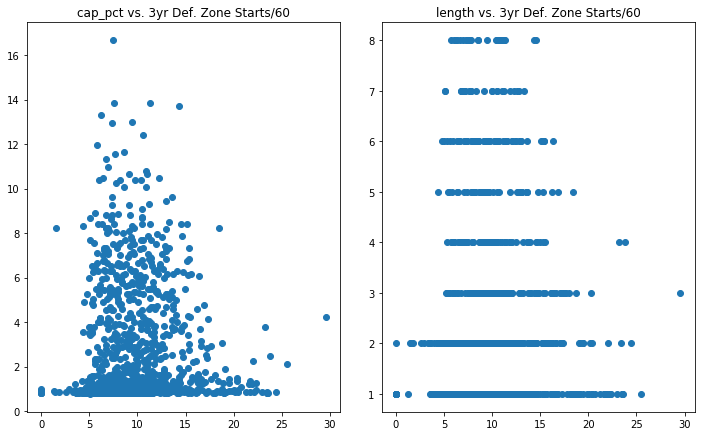

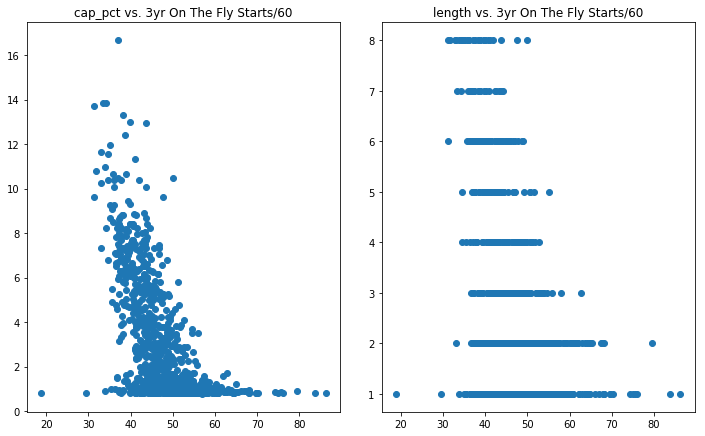

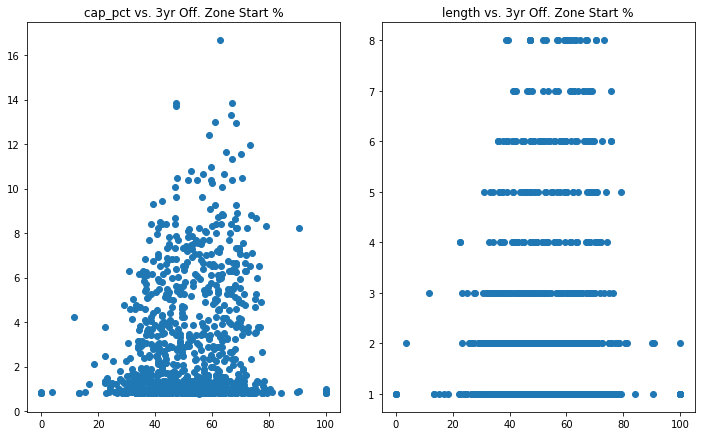

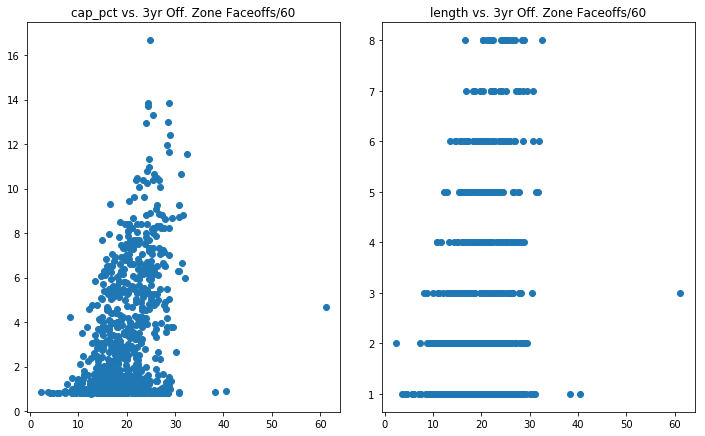

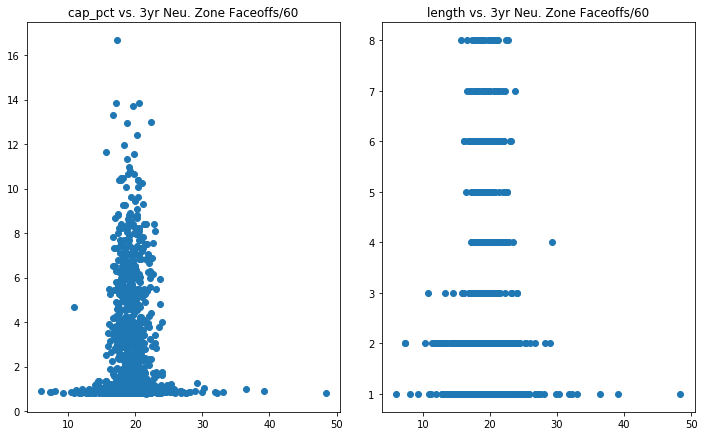

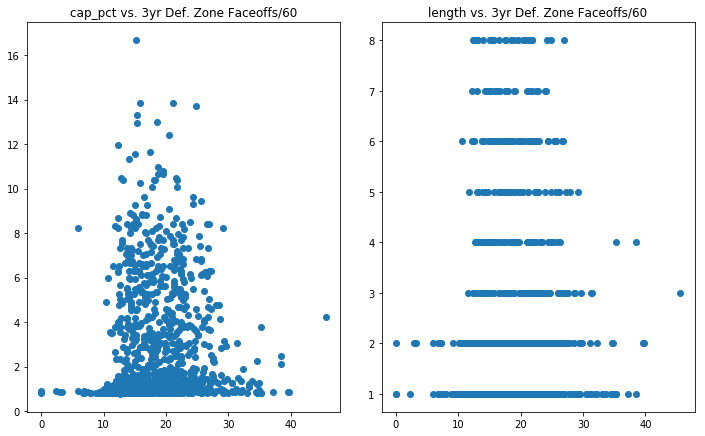

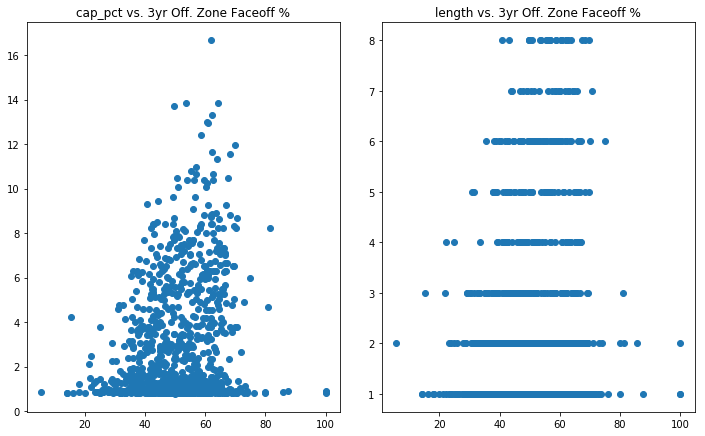

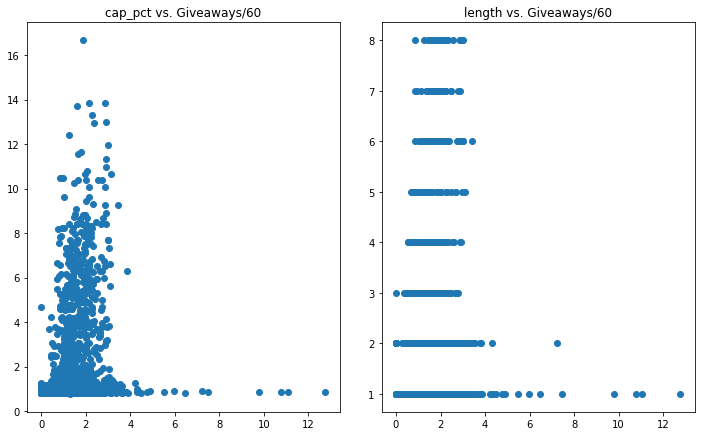

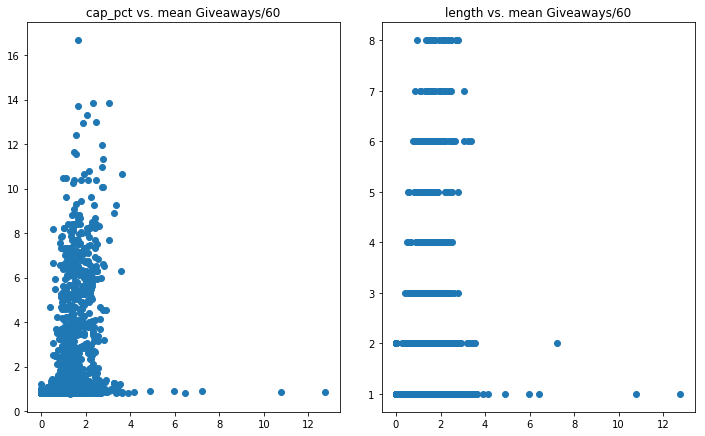

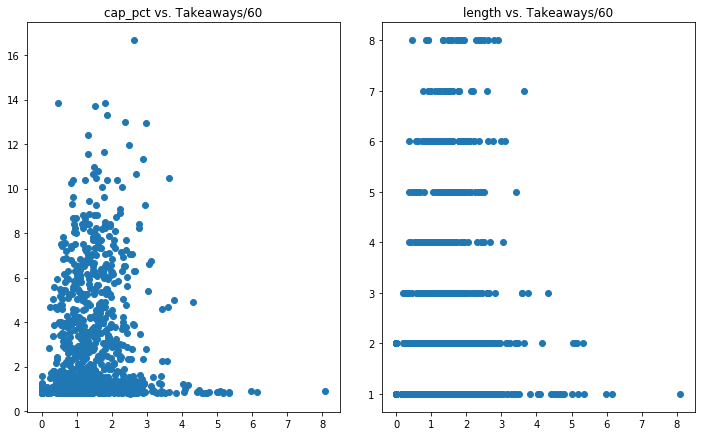

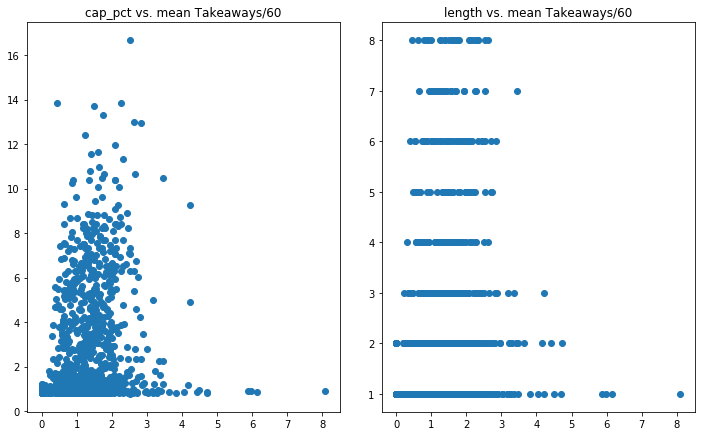

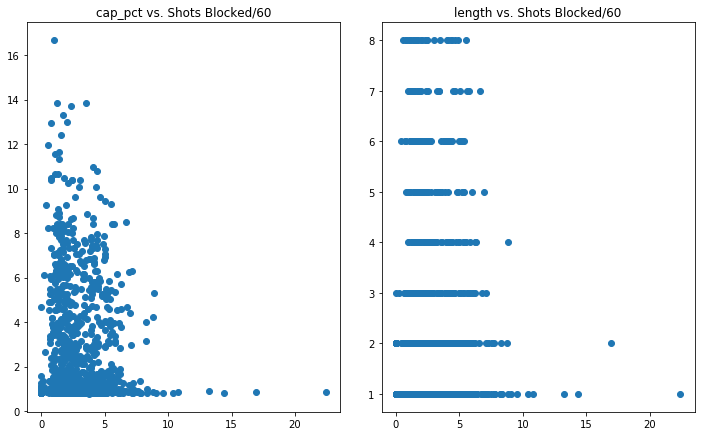

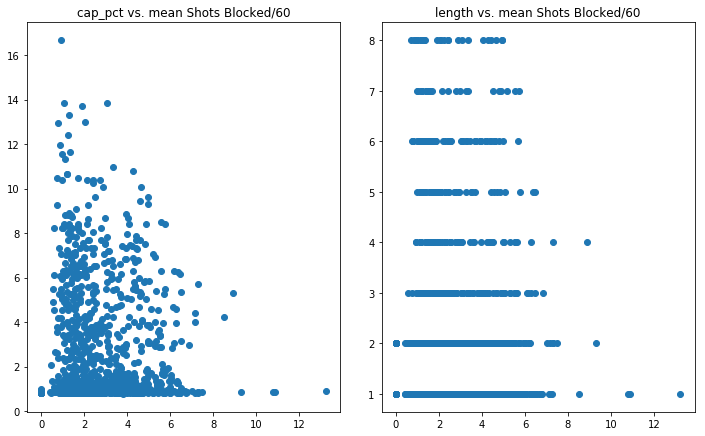

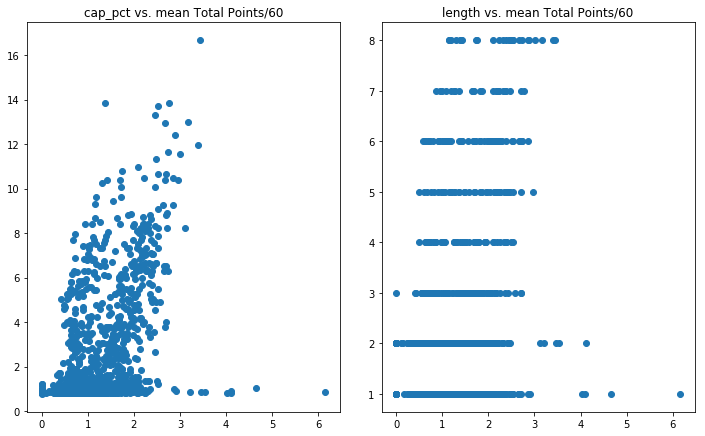

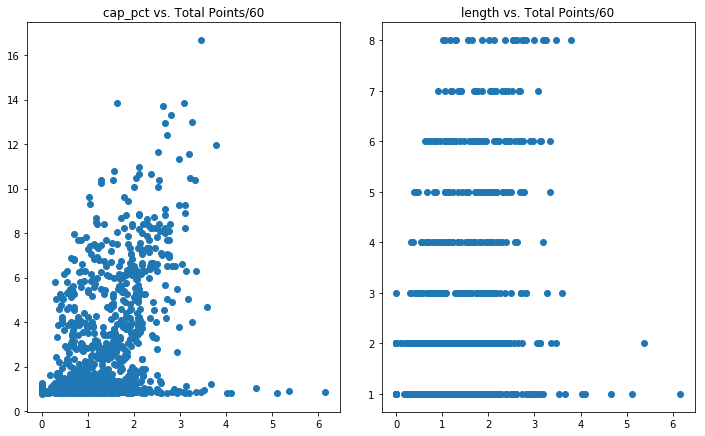

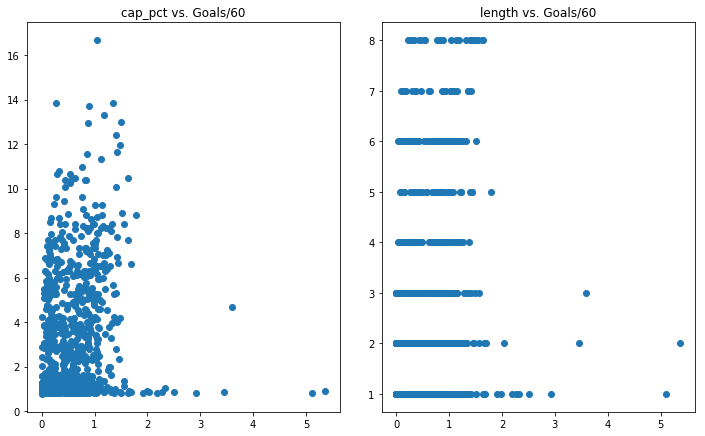

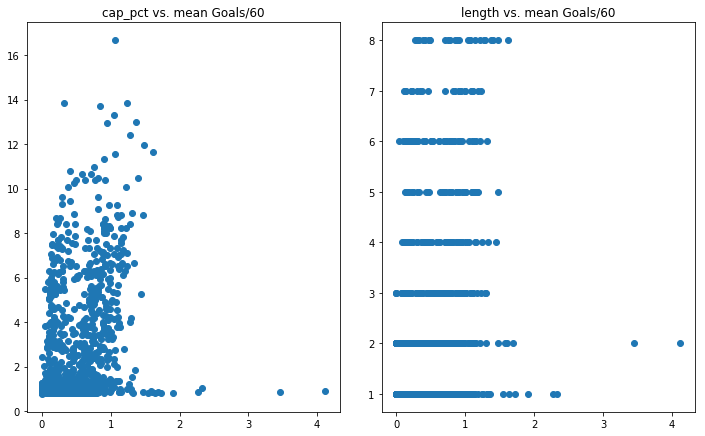

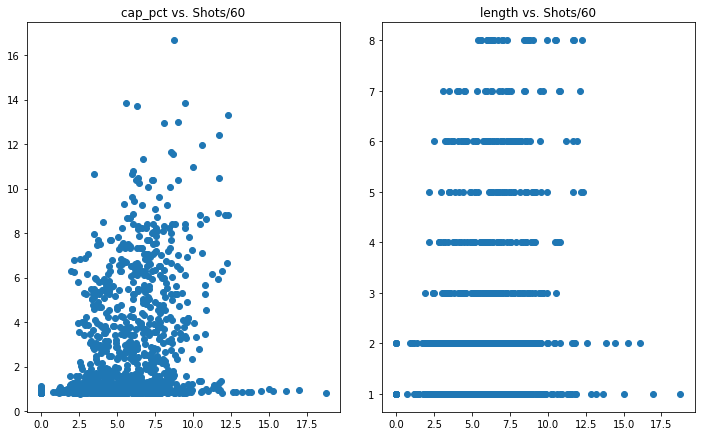

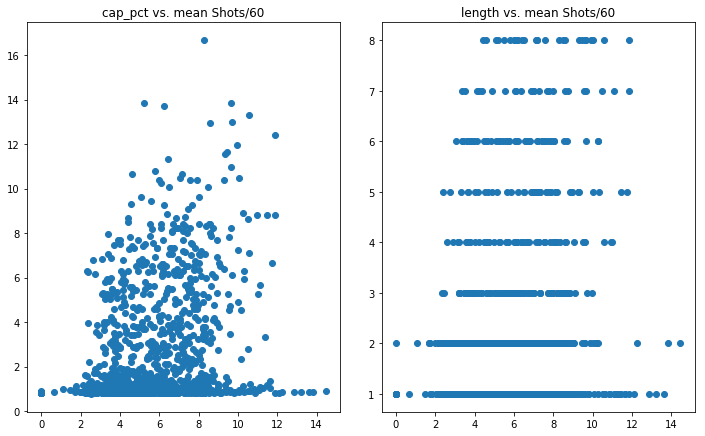

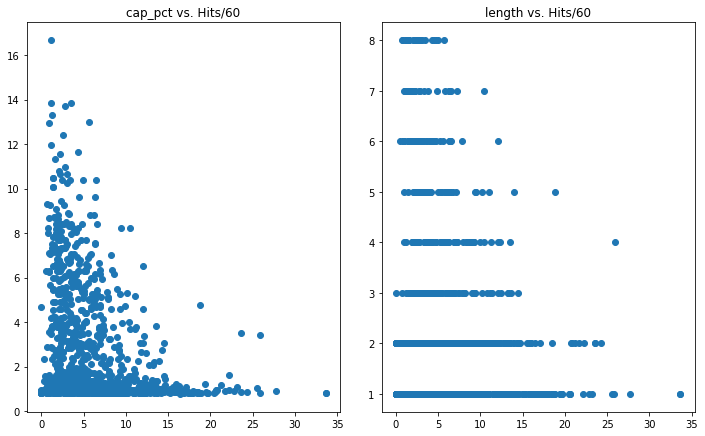

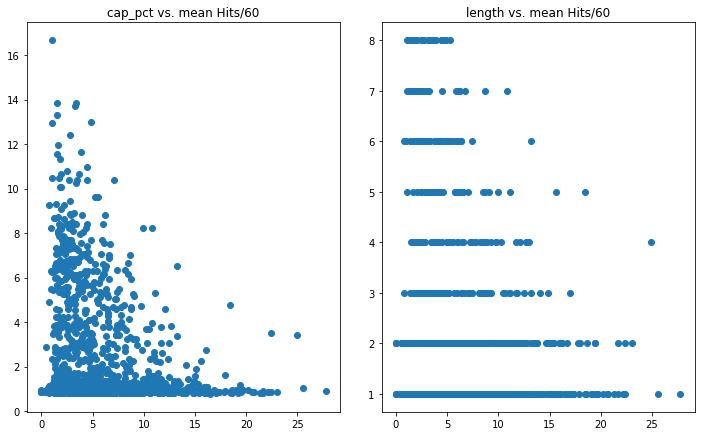

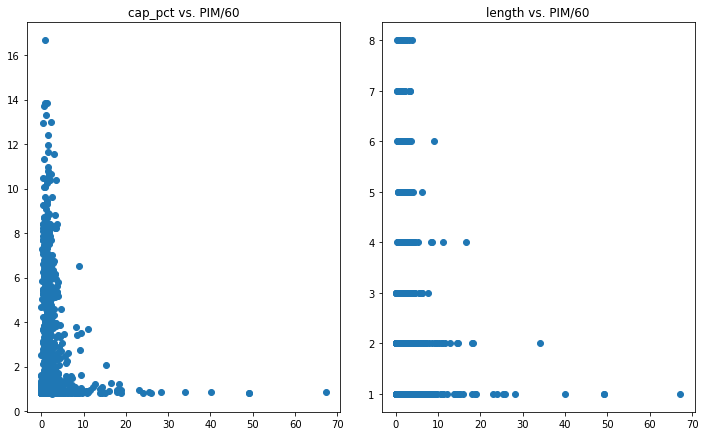

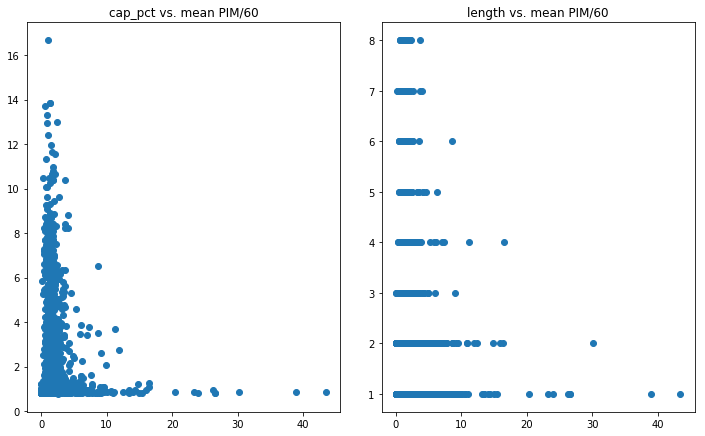

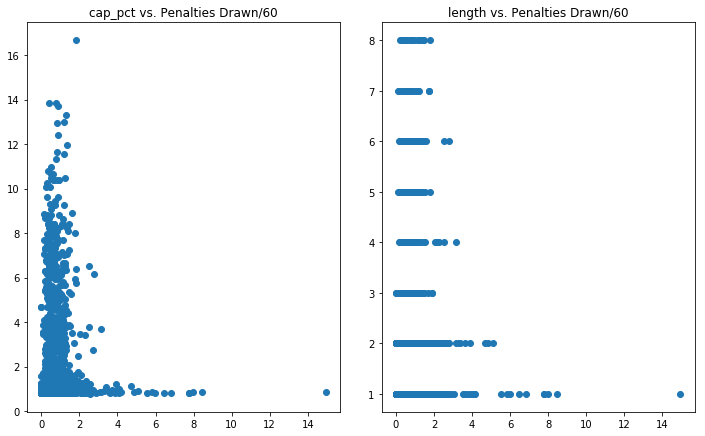

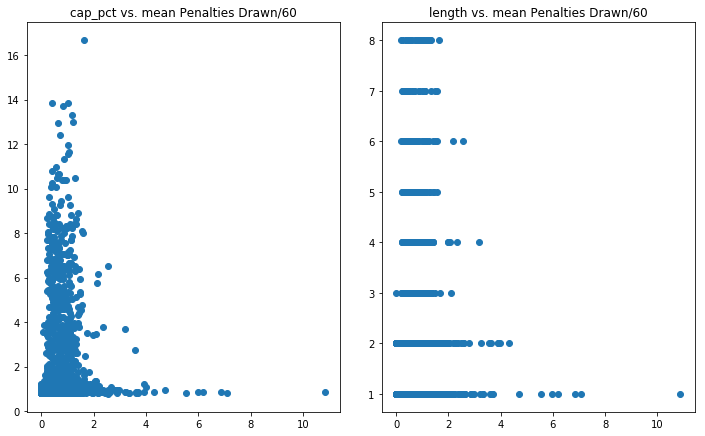

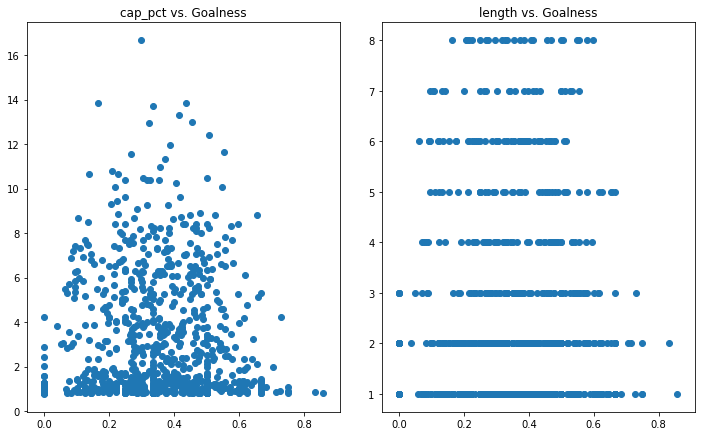

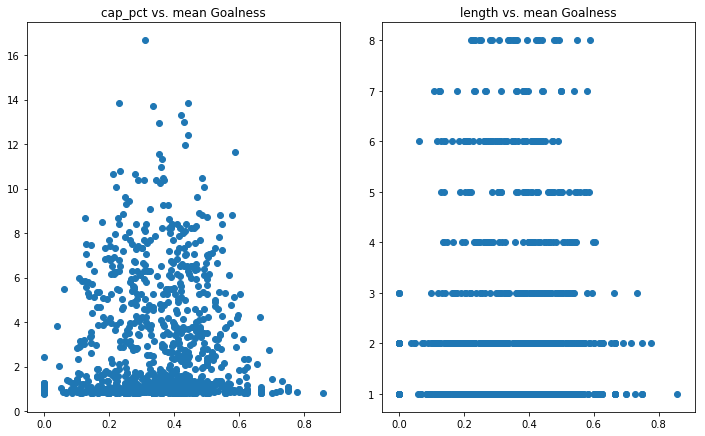

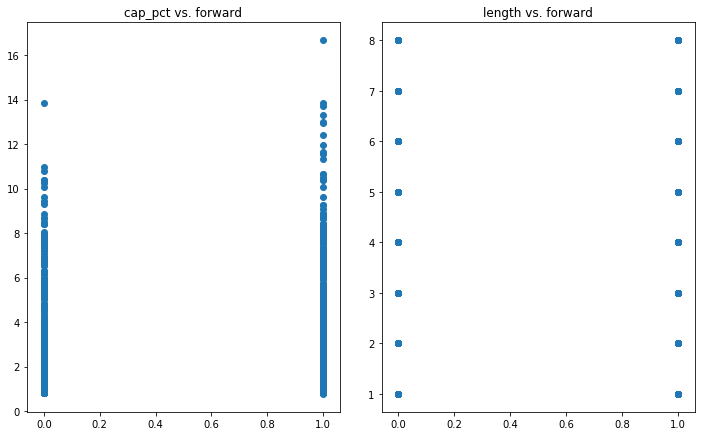

In [72]:
for idx, c in enumerate(Xdf.columns):
    fig, ax = plt.subplots(1,2, figsize = (10,6))
    plt.tight_layout()
    
    ax[0].scatter(Xdf[c], y['cap_pct'])
    ax[0].set_title('cap_pct vs. ' + c)
    ax[1].scatter(Xdf[c], y['length'])
    ax[1].set_title('length vs. ' + c)
    plt.show()